In [3]:
import wget

ModuleNotFoundError: No module named 'wget'

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [5]:
import matplotlib.pyplot as plt

## Get Data

In [4]:
#wget.download("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv")

In [6]:
import pandas as pd

In [8]:
df=pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates=['Date'],
              index_col=['Date'])

In [9]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [11]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':"Price"})

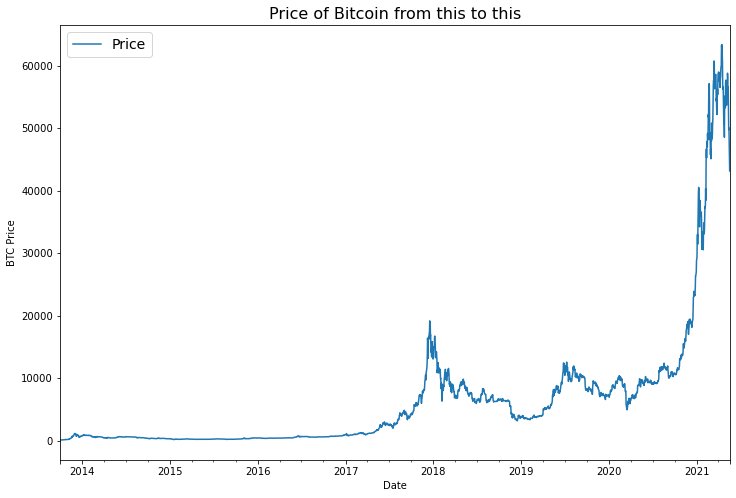

In [12]:

bitcoin_prices.plot(figsize=(12,8))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from this to this",fontsize=16)
plt.legend(fontsize=14)

## Import time seires with csv module

In [13]:
import csv
from datetime import datetime
timesteps = []

btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
    csv_reader = csv.reader(f,delimiter=',')
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
        btc_price.append(float(line[2]))
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [16]:
import numpy as np

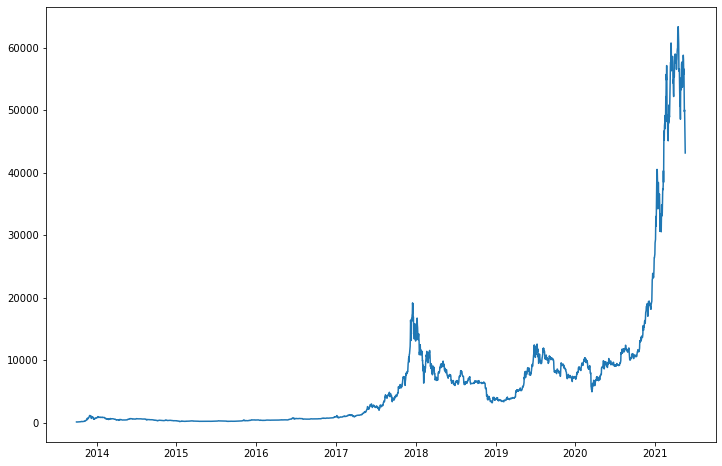

In [15]:
plt.figure(figsize=(12,8))
plt.plot(timesteps,btc_price)

## Create train test split data (wrong way)

In [17]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [18]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()



In [19]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices, 
                                                    test_size=0.2, 
                                                    random_state=42)
X_train.shape,X_test.shape

((2229,), (558,))

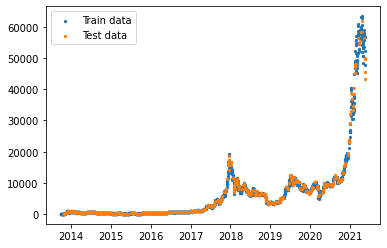

In [13]:
plt.scatter(X_train,y_train,s=5,label='Train data')
plt.scatter(X_test,y_test,s=5,label='Test data')
plt.legend()

## Split with right way

In [20]:
split_size = int(0.8*len(prices))
split_size

2229

In [21]:
X_train = timesteps[:split_size]
y_train = prices[:split_size]
X_test = timesteps[split_size:]
y_test = prices[split_size:]


In [22]:
len(X_train),len(X_test)

(2229, 558)

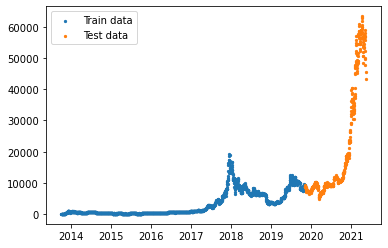

In [23]:
plt.scatter(X_train,y_train,s=5,label='Train data')
plt.scatter(X_test,y_test,s=5,label='Test data')
plt.legend()

In [24]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

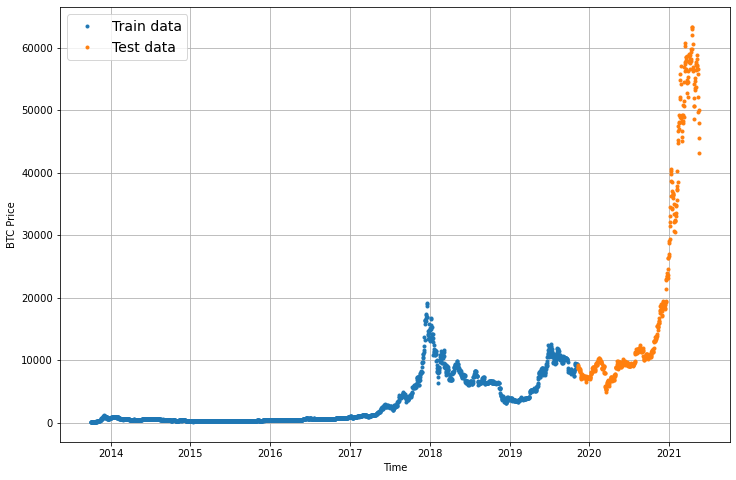

In [25]:
plt.figure(figsize=(12,8));
plot_time_series(X_train,y_train,label='Train data');
plot_time_series(X_test,y_test,label='Test data');

## Modeling Experiments

### Model 0 Naive forecast

In [26]:
naive_forecast = y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

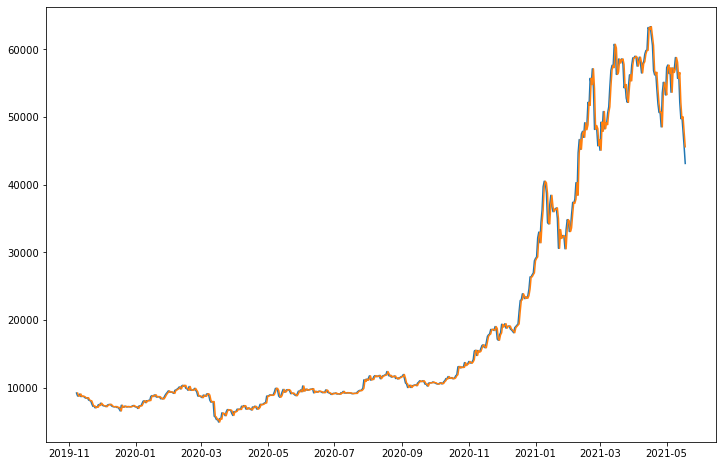

In [27]:
plt.figure(figsize=(12,8))
plt.plot(X_test,y_test)
plt.plot(X_test[1:],naive_forecast)

## Evaluating model

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [29]:
y_test[1:].mean()

20076.076674945223

In [30]:
np.sqrt(mean_squared_error(y_test[1:],naive_forecast))

1071.2362601330744

In [31]:
mean_absolute_error(y_test[1:],naive_forecast)

567.9802273457542

#### MASE Implementation



In [32]:
def mean_absolute_scaled_error(y_true,y_pred):
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    return mae / mae_naive_no_season

In [33]:
mean_absolute_scaled_error(y_test[1:],naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [34]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [35]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)

In [36]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Format Dataset windowed

In [37]:
HORIZON = 1
BATCH_SIZE = 32
WINDOW_SIZE = 7

In [38]:
def get_labelled_windows(x,horizon=HORIZON):
  
    return x[:,:-horizon],x[:,-horizon:]

In [39]:
get_labelled_windows(tf.expand_dims(tf.range(32)+1,axis=0))

(<tf.Tensor: shape=(1, 31), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[32]])>)

In [40]:
np.expand_dims(np.arange(7+1),axis=0).shape

(1, 8)

In [41]:
np.expand_dims(np.arange(10-7+1-1),axis=0).T.shape

(3, 1)

In [42]:
def make_windows(x,window_size =WINDOW_SIZE,horizon=HORIZON):
    
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    window_indexes = window_step +np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
#     print(window_step)
#     print(f"widow indexes:\n{window_indexes,window_indexes.shape}")
    
    windowed_array = x[window_indexes]
    windows,labels = get_labelled_windows(windowed_array,horizon)
    return windows,labels
    
    

In [43]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [44]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [45]:
full_windows,full_labels =make_windows(prices)

In [46]:
for i in range(3):
    print(f"{full_windows[i-3]} -> {full_labels[i-3]}")

[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> [47885.62525472]
[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> [45604.61575361]
[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> [43144.47129086]


In [47]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [48]:
def window(x,window=WINDOW_SIZE,horizon=HORIZON):
    windowed_size = np.expand_dims(np.arange(window+horizon),axis=0)
    
    window_first = np.expand_dims(np.arange(len(x)-window+horizon-1),axis=1)
    
    window_index = windowed_size+window_first
    
    windowed_value = x[window_index]
    
    return windowed_value[:,:window],windowed_value[:,-horizon:]
    
    
    
    

In [48]:
s,t=window(prices)

In [49]:
s[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [50]:
t[0]

array([123.033])

In [51]:
for i in range(3):
    print(f"{s[i-3]} ->{t[i-3]}")

[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] ->[47885.62525472]
[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] ->[45604.61575361]
[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] ->[43144.47129086]


In [52]:
len(prices)

2787

In [53]:
len(full_windows)

2780

## Turning windows into training and test sets

In [49]:
def make_train_test_splits(windows,labels,test_split=0.2):
    split_size = int(len(windows)* (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows,test_windows,train_labels,test_labels

In [81]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [51]:
len(train_windows),len(test_labels),len(train_labels)

(2224, 556, 2224)

In [337]:
X_train[0].shape

(7,)

In [83]:
train_windows.shape

(2224, 7)

In [52]:
np.array_equal(train_labels.flatten()[:-HORIZON-1],y_train[WINDOW_SIZE:])

True

In [53]:
np.squeeze(train_labels[:-HORIZON-1])

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

### Make model checkpoint

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input

In [55]:
import os

In [56]:
def create_model_checkpoint(model_name,save_path="model_experiment"):
    return ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                          save_best_only=True,
                          verbose=0,
                           monitor='val_loss'
                          )

### Model 1 Dense model (window = 7,horizon=1)

In [62]:
import tensorflow as tf

In [57]:
tf.random.set_seed(42)
model_1 = Sequential(name='Model_1')
#model_1.add(Input(shape=(128,WINDOW_SIZE)))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(HORIZON,activation='linear'))

model_1.compile(metrics=['mae','mse'],optimizer=Adam(),loss='mae')

model_1.fit(x=train_windows,
            y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 50ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 32ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 37ms/step - loss: 158.5

18/18 [==============================] - 1s 32ms/step - loss: 108.2325 - mae: 108.2325 - mse: 71962.0859 - val_loss: 573.5618 - val_mae: 573.5618 - val_mse: 1188986.2500
Epoch 66/100
18/18 [==============================] - 1s 31ms/step - loss: 108.6825 - mae: 108.6825 - mse: 71026.3516 - val_loss: 572.2206 - val_mae: 572.2206 - val_mse: 1187818.3750
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 106.6371 - mae: 106.6371 - mse: 70166.2578 - val_loss: 646.6359 - val_mae: 646.6359 - val_mse: 1356393.0000
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 114.1603 - mae: 114.1603 - mse: 71297.3203 - val_loss: 681.8572 - val_mae: 681.8572 - val_mse: 1455430.5000
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 124.5514 - mae: 124.5514 - mse: 81238.9609 - val_loss: 655.9892 - val_mae: 655.9892 - val_mse: 1383324.6250
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 125.0234 - mae: 125.0234 - 

In [64]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [65]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.0000


[585.9757690429688, 585.9757690429688, 1197802.0]

In [66]:
model_1 = tf.keras.models.load_model("model_experiment/Model_1/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.7500


[568.9510498046875, 568.9510498046875, 1171743.75]

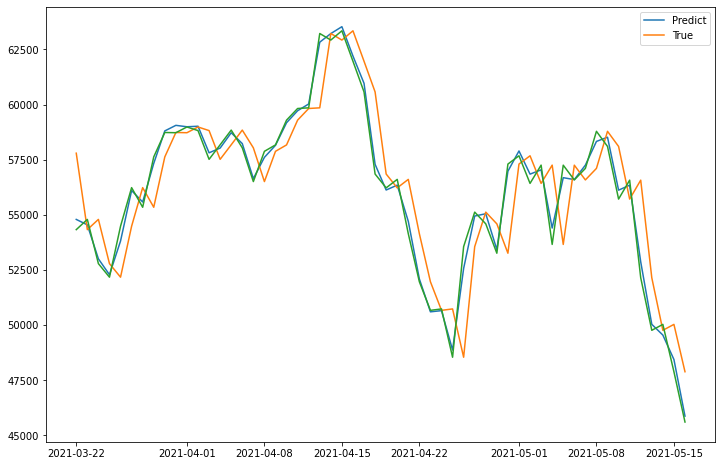

In [67]:
plt.figure(figsize=(12,8))
start = 500
plt.plot(X_test[start:-2],model_1.predict(test_windows).flatten()[start:],label='Predict')
plt.plot(X_test[start:-2],y_test[start:-2],label='True')
plt.plot(X_test[start:-2],y_test[start+1:-1])

plt.legend()

In [451]:
def make_preds(model,input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [69]:
model_1_preds = make_preds(model_1,test_windows)

In [70]:
len(test_labels),len(model_1_preds)

(556, 556)

In [71]:
test_labels.shape,model_1_preds.shape

((556, 1), TensorShape([556]))

In [72]:
model_1_results = evaluate_preds(test_labels.flatten(),model_1_preds)
model_1_results

{'MAE': 568.9511,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.5448983,
 'MASE': 0.99948955}

In [73]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.516525,
 'MASE': 0.99957}

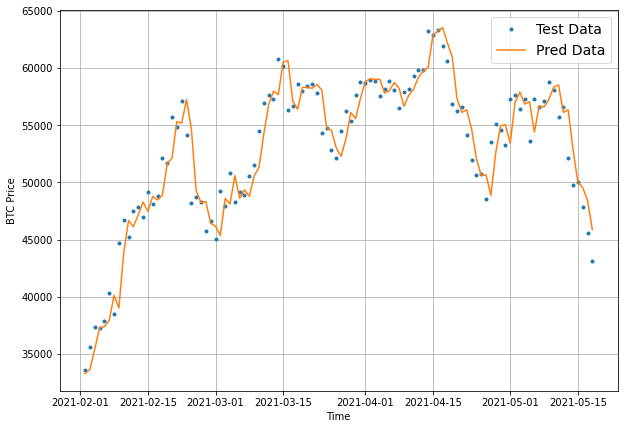

In [74]:
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 label='Pred Data',
                format="-")


### Model 2 : same as model 1 (window size = 30), (horizon = 1)

In [75]:
full_windows,full_labels =make_windows(prices,window_size=30,horizon=1)

In [76]:
full_windows.shape,full_labels.shape

((2757, 30), (2757, 1))

In [77]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [78]:
len(train_windows)

2205

In [79]:
tf.random.set_seed(42)
model_2 = Sequential(name='Model_2')
#model_1.add(Input(shape=(128,WINDOW_SIZE)))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(HORIZON,activation='linear'))

model_2.compile(metrics=['mae','mse'],optimizer=Adam(),loss='mae')

model_2.fit(x=train_windows,
            y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 46ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 0s 29ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss

Epoch 32/100
18/18 [==============================] - 1s 30ms/step - loss: 148.1294 - mae: 148.1294 - mse: 106817.7812 - val_loss: 726.4918 - val_mae: 726.4918 - val_mse: 1772761.8750
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 141.7309 - mae: 141.7309 - mse: 102930.2734 - val_loss: 767.2233 - val_mae: 767.2233 - val_mse: 1945827.2500
Epoch 34/100
18/18 [==============================] - 0s 21ms/step - loss: 135.4458 - mae: 135.4458 - mse: 92370.8281 - val_loss: 721.9368 - val_mae: 721.9368 - val_mse: 1763867.0000
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 131.7838 - mae: 131.7838 - mse: 91448.7891 - val_loss: 759.3353 - val_mae: 759.3353 - val_mse: 1836807.0000
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 131.5018 - mae: 131.5018 - mse: 92934.0938 - val_loss: 814.7689 - val_mae: 814.7689 - val_mse: 1997793.3750
Epoch 37/100
18/18 [==============================] - 0s 22ms/step - loss: 143.4647 - 

Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 123.1770 - mae: 123.1770 - mse: 80330.8672 - val_loss: 1110.4432 - val_mae: 1110.4432 - val_mse: 2994969.0000
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 135.9602 - mae: 135.9602 - mse: 92325.2969 - val_loss: 778.5548 - val_mae: 778.5548 - val_mse: 1764892.6250
Epoch 71/100
18/18 [==============================] - 0s 22ms/step - loss: 128.7049 - mae: 128.7049 - mse: 86091.0781 - val_loss: 636.7365 - val_mae: 636.7365 - val_mse: 1380941.6250
Epoch 72/100
18/18 [==============================] - 0s 22ms/step - loss: 120.7498 - mae: 120.7498 - mse: 80539.0547 - val_loss: 636.1567 - val_mae: 636.1567 - val_mse: 1384186.6250
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8846 - mae: 119.8846 - mse: 78536.1172 - val_loss: 722.2628 - val_mae: 722.2628 - val_mse: 1590577.5000
Epoch 74/100
18/18 [==============================] - 0s 21ms/step - loss: 128.0455 - 

In [80]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.5000


[659.3331909179688, 659.3331909179688, 1397247.5]

In [81]:
model_2 = tf.keras.models.load_model("model_experiment/Model_2/")

In [82]:
model_2_preds = make_preds(model_2,test_windows)

In [83]:
model_2_preds

<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8882.84  ,  8904.423 ,  8762.442 ,  8559.087 ,  8428.983 ,
        8327.641 ,  8256.728 ,  8126.8335,  8171.7334,  7796.058 ,
        7325.6577,  7209.108 ,  7086.571 ,  7088.627 ,  7125.4873,
        7328.0757,  7507.9004,  7594.797 ,  7616.422 ,  7437.9917,
        7401.9155,  7259.2407,  7303.4756,  7365.538 ,  7525.4897,
        7530.848 ,  7548.2666,  7428.255 ,  7184.106 ,  7258.7397,
        7140.139 ,  7315.1187,  7133.9297,  7208.6655,  6967.998 ,
        6742.6772,  7080.0107,  7248.492 ,  7093.139 ,  7293.914 ,
        7237.0957,  7260.9443,  7262.6865,  7210.3843,  7192.7495,
        7244.186 ,  7230.772 ,  7403.2314,  7343.5273,  7169.8228,
        7253.465 ,  6980.7856,  7178.303 ,  7273.955 ,  7418.6357,
        7659.6807,  7985.743 ,  8056.751 ,  7966.3237,  7972.895 ,
        8097.725 ,  8179.08  ,  8190.518 ,  8560.984 ,  8853.662 ,
        8800.606 ,  8928.045 ,  8896.012 ,  8778.657 ,  8637.83  ,
        8713.6

In [84]:
model_2_results = evaluate_preds(test_labels.flatten(),model_2_preds)
model_2_results

{'MAE': 605.8741,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.7264452,
 'MASE': 1.0590738}

In [85]:
model_1_results

{'MAE': 568.9511,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.5448983,
 'MASE': 0.99948955}

In [86]:
test_labels.flatten()

array([ 8749.52059102,  8656.97092235,  8500.64355816,  8469.2608989 ,
        8537.33965197,  8205.80636599,  8118.4885358 ,  8074.84317361,
        7612.7405735 ,  7262.11053495,  7303.40575852,  7041.73293642,
        7211.86180875,  7141.06944869,  7523.4806726 ,  7390.20746923,
        7729.26593894,  7542.23560864,  7381.96300782,  7333.43293049,
        7315.36776456,  7213.73376172,  7398.78704961,  7511.88058312,
        7532.12351309,  7550.23919987,  7333.09604316,  7239.76257544,
        7198.06667705,  7190.27236926,  7238.87432299,  7087.02498535,
        7112.73147612,  6883.49639377,  6584.02884335,  7424.01540023,
        7147.56832379,  7139.93337053,  7286.33508116,  7236.98620461,
        7166.17237853,  7235.6266505 ,  7212.80939522,  7183.70653603,
        7227.29371168,  7311.56064392,  7385.46484791,  7251.27679432,
        7179.95781929,  7174.74401195,  6955.48757967,  7291.21950532,
        7337.63667014,  7347.43326444,  7713.86075365,  8039.60370082,
      

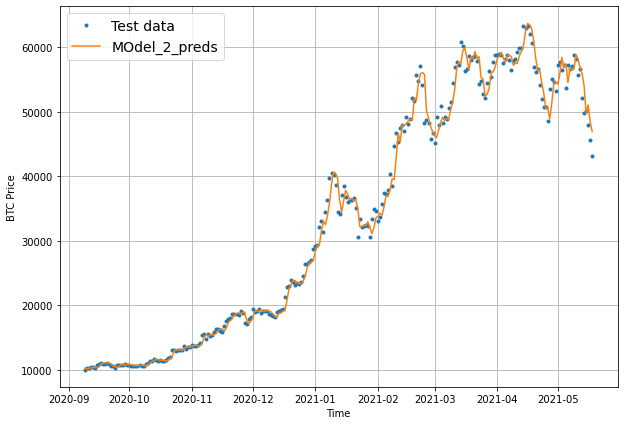

In [87]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):],test_labels[:,0],start=offset,label='Test data')
plot_time_series(X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label='MOdel_2_preds')

### Model 3: Dense (window = 30, horizon = 7)

In [14]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [15]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [16]:

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [17]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [13]:
full_window,full_label=make_windows(prices,window_size=30,horizon=7)

NameError: name 'prices' is not defined

In [93]:
len(full_window),len(full_label)

(2751, 2751)

In [94]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [95]:
len(train_windows),len(test_labels)

(2205, 552)

In [96]:
tf.random.set_seed(42)
model_3 = Sequential(name='Model_3')
#model_1.add(Input(shape=(128,WINDOW_SIZE)))
model_3.add(Dense(128,activation='relu'))
model_3.add(Dense(7,activation='linear'))

model_3.compile(metrics=['mae','mse'],optimizer=Adam(),loss='mae')

model_3.fit(x=train_windows,
            y=train_labels,
           epochs=100,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 25ms/step - loss: 1419.9785 - mae: 1419.9785 - mse: 9499607.0000 - val_loss: 2896.7302 - val_mae: 2896.7302 - val_mse: 22171014.0000
Epoch 2/100
18/18 [==============================] - 0s 20ms/step - loss: 509.2082 - mae: 509.2082 - mse: 1164875.8750 - val_loss: 2203.5601 - val_mae: 2203.5601 - val_mse: 13893363.0000
Epoch 3/100
18/18 [==============================] - 0s 20ms/step - loss: 376.6431 - mae: 376.6431 - mse: 661162.0000 - val_loss: 1770.1362 - val_mae: 1770.1362 - val_mse: 9183264.0000
Epoch 4/100
18/18 [==============================] - 0s 22ms/step - loss: 316.1041 - mae: 316.1041 - mse: 474431.3125 - val_loss: 1438.7616 - val_mae: 1438.7616 - val_mse: 6428630.5000
Epoch 5/100
18/18 [==============================] - 0s 22ms/step - loss: 270.5205 - mae: 270.5205 - mse: 349479.7500 - val_loss: 1345.9634 - val_mae: 1345.9634 - val_mse: 5618038.5000
Epoch 6/100
18/18 [==============================] - 0s 22ms/step - l

Epoch 31/100
18/18 [==============================] - 0s 21ms/step - loss: 143.9066 - mae: 143.9066 - mse: 105396.4844 - val_loss: 785.1982 - val_mae: 785.1982 - val_mse: 2000653.2500
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 144.0237 - mae: 144.0237 - mse: 105779.3281 - val_loss: 799.9732 - val_mae: 799.9732 - val_mse: 2063492.6250
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 142.4292 - mae: 142.4292 - mse: 103349.1797 - val_loss: 851.1090 - val_mae: 851.1090 - val_mse: 2301959.7500
Epoch 34/100
18/18 [==============================] - 0s 21ms/step - loss: 142.6656 - mae: 142.6656 - mse: 104335.4375 - val_loss: 775.7852 - val_mae: 775.7852 - val_mse: 1957619.7500
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 149.6742 - mae: 149.6742 - mse: 106495.5781 - val_loss: 799.8508 - val_mae: 799.8508 - val_mse: 2041696.8750
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 140.3359 

Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 126.6794 - mae: 126.6794 - mse: 82947.2422 - val_loss: 679.6969 - val_mae: 679.6969 - val_mse: 1537554.7500
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 122.9393 - mae: 122.9393 - mse: 81822.8125 - val_loss: 681.6487 - val_mae: 681.6487 - val_mse: 1546166.5000
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3991 - mae: 124.3991 - mse: 82480.7578 - val_loss: 713.3689 - val_mae: 713.3689 - val_mse: 1610660.1250
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 124.6320 - mae: 124.6320 - mse: 81818.1953 - val_loss: 722.2766 - val_mae: 722.2766 - val_mse: 1640370.3750
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.5237 - mae: 124.5237 - mse: 82463.2344 - val_loss: 707.2946 - val_mae: 707.2946 - val_mse: 1588631.1250
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 124.0199 - mae: 

In [97]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 702.3416 - mae: 702.3416 - mse: 1541646.5000


[702.3416137695312, 702.3416137695312, 1541646.5]

In [98]:
model_3 = tf.keras.models.load_model("model_experiment/Model_3/")

In [99]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 626.5261 - mae: 626.5261 - mse: 1346312.7500


[626.5260620117188, 626.5260620117188, 1346312.75]

In [100]:
model_3_preds = make_preds(model_3,test_windows)

In [101]:
model_3_preds.shape

TensorShape([552, 7])

In [102]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8991.691, 8937.682, 8830.556, 8852.853, 8898.763, 8986.724,
        8848.014],
       [8902.945, 8987.835, 8996.881, 8833.55 , 8781.812, 9019.121,
        8918.478],
       [8752.008, 8767.166, 8830.347, 8720.877, 8805.518, 8745.545,
        8769.534],
       [8622.495, 8520.005, 8619.766, 8544.339, 8690.359, 8572.103,
        8518.903],
       [8687.354, 8545.392, 8525.108, 8553.687, 8534.289, 8485.646,
        8434.34 ]], dtype=float32)>

In [103]:
model_3_preds.numpy().flatten()

array([ 8991.691,  8937.682,  8830.556, ..., 46763.344, 46612.496,
       46092.22 ], dtype=float32)

In [104]:
a = np.arange(10).reshape(-1,1)

In [105]:
b = np.arange(10)

In [106]:
a+b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

In [107]:
np.expand_dims(np.random.randint(10,size=(2,5)),1)

array([[[3, 0, 1, 3, 6]],

       [[5, 9, 7, 6, 5]]])

In [108]:
np.random.randint(10,size=(2,5))

array([[4, 8, 3, 6, 1],
       [3, 4, 4, 5, 9]])

In [109]:
np.exp

<ufunc 'exp'>

In [110]:
a.reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [111]:
test_labels

array([[ 8749.52059102],
       [ 8656.97092235],
       [ 8500.64355816],
       [ 8469.2608989 ],
       [ 8537.33965197],
       [ 8205.80636599],
       [ 8118.4885358 ],
       [ 8074.84317361],
       [ 7612.7405735 ],
       [ 7262.11053495],
       [ 7303.40575852],
       [ 7041.73293642],
       [ 7211.86180875],
       [ 7141.06944869],
       [ 7523.4806726 ],
       [ 7390.20746923],
       [ 7729.26593894],
       [ 7542.23560864],
       [ 7381.96300782],
       [ 7333.43293049],
       [ 7315.36776456],
       [ 7213.73376172],
       [ 7398.78704961],
       [ 7511.88058312],
       [ 7532.12351309],
       [ 7550.23919987],
       [ 7333.09604316],
       [ 7239.76257544],
       [ 7198.06667705],
       [ 7190.27236926],
       [ 7238.87432299],
       [ 7087.02498535],
       [ 7112.73147612],
       [ 6883.49639377],
       [ 6584.02884335],
       [ 7424.01540023],
       [ 7147.56832379],
       [ 7139.93337053],
       [ 7286.33508116],
       [ 7236.98620461],


In [112]:
model_3_preds[:,0]

<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8991.691 ,  8902.945 ,  8752.008 ,  8622.495 ,  8687.354 ,
        8585.898 ,  8242.637 ,  8089.9595,  8213.25  ,  7890.641 ,
        7473.8213,  7415.5923,  7234.916 ,  7200.032 ,  7211.8477,
        7518.626 ,  7493.001 ,  7683.3745,  7688.037 ,  7573.2876,
        7517.9863,  7419.6924,  7389.9644,  7416.3447,  7579.4673,
        7548.479 ,  7562.9565,  7434.6255,  7306.3545,  7286.387 ,
        7311.7705,  7398.5513,  7258.2397,  7300.659 ,  7046.287 ,
        6806.498 ,  7196.173 ,  7281.967 ,  7180.964 ,  7337.6455,
        7338.744 ,  7266.827 ,  7299.4775,  7377.841 ,  7262.261 ,
        7286.92  ,  7376.519 ,  7455.6255,  7285.693 ,  7220.0737,
        7275.8086,  7115.89  ,  7307.945 ,  7420.614 ,  7469.835 ,
        7664.58  ,  8042.757 ,  8115.295 ,  8023.645 ,  8083.119 ,
        8136.1206,  8188.323 ,  8253.336 ,  8711.663 ,  8863.549 ,
        8809.113 ,  8972.641 ,  8983.787 ,  8773.0625,  8722.631 ,
        8875.4

In [113]:
tf.squeeze(test_labels)

<tf.Tensor: shape=(552,), dtype=float64, numpy=
array([ 8749.52059102,  8656.97092235,  8500.64355816,  8469.2608989 ,
        8537.33965197,  8205.80636599,  8118.4885358 ,  8074.84317361,
        7612.7405735 ,  7262.11053495,  7303.40575852,  7041.73293642,
        7211.86180875,  7141.06944869,  7523.4806726 ,  7390.20746923,
        7729.26593894,  7542.23560864,  7381.96300782,  7333.43293049,
        7315.36776456,  7213.73376172,  7398.78704961,  7511.88058312,
        7532.12351309,  7550.23919987,  7333.09604316,  7239.76257544,
        7198.06667705,  7190.27236926,  7238.87432299,  7087.02498535,
        7112.73147612,  6883.49639377,  6584.02884335,  7424.01540023,
        7147.56832379,  7139.93337053,  7286.33508116,  7236.98620461,
        7166.17237853,  7235.6266505 ,  7212.80939522,  7183.70653603,
        7227.29371168,  7311.56064392,  7385.46484791,  7251.27679432,
        7179.95781929,  7174.74401195,  6955.48757967,  7291.21950532,
        7337.63667014,  7347.

In [114]:
model_3_preds

<tf.Tensor: shape=(552, 7), dtype=float32, numpy=
array([[ 8991.691,  8937.682,  8830.556, ...,  8898.763,  8986.724,
         8848.014],
       [ 8902.945,  8987.835,  8996.881, ...,  8781.812,  9019.121,
         8918.478],
       [ 8752.008,  8767.166,  8830.347, ...,  8805.518,  8745.545,
         8769.534],
       ...,
       [51253.8  , 50584.8  , 51033.855, ..., 50386.344, 51481.305,
        50259.45 ],
       [49485.73 , 48552.9  , 49714.06 , ..., 49237.168, 49417.137,
        49000.54 ],
       [47789.348, 47434.152, 46863.664, ..., 46763.344, 46612.496,
        46092.22 ]], dtype=float32)>

In [115]:
test_labels

array([[ 8749.52059102],
       [ 8656.97092235],
       [ 8500.64355816],
       [ 8469.2608989 ],
       [ 8537.33965197],
       [ 8205.80636599],
       [ 8118.4885358 ],
       [ 8074.84317361],
       [ 7612.7405735 ],
       [ 7262.11053495],
       [ 7303.40575852],
       [ 7041.73293642],
       [ 7211.86180875],
       [ 7141.06944869],
       [ 7523.4806726 ],
       [ 7390.20746923],
       [ 7729.26593894],
       [ 7542.23560864],
       [ 7381.96300782],
       [ 7333.43293049],
       [ 7315.36776456],
       [ 7213.73376172],
       [ 7398.78704961],
       [ 7511.88058312],
       [ 7532.12351309],
       [ 7550.23919987],
       [ 7333.09604316],
       [ 7239.76257544],
       [ 7198.06667705],
       [ 7190.27236926],
       [ 7238.87432299],
       [ 7087.02498535],
       [ 7112.73147612],
       [ 6883.49639377],
       [ 6584.02884335],
       [ 7424.01540023],
       [ 7147.56832379],
       [ 7139.93337053],
       [ 7286.33508116],
       [ 7236.98620461],


In [116]:
tf.squeeze(test_labels).shape,model_3_preds.shape

(TensorShape([552]), TensorShape([552, 7]))

In [117]:
tf.reduce_mean(model_3_preds,axis=1)

<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8906.611 ,  8920.089 ,  8770.143 ,  8583.995 ,  8537.974 ,
        8434.936 ,  8199.192 ,  8081.566 ,  8128.383 ,  7826.5317,
        7499.0347,  7352.9185,  7149.521 ,  7130.7085,  7082.8135,
        7389.404 ,  7452.954 ,  7631.203 ,  7642.2383,  7525.53  ,
        7450.255 ,  7330.9907,  7329.307 ,  7358.472 ,  7475.172 ,
        7522.723 ,  7562.228 ,  7379.5312,  7260.5264,  7227.046 ,
        7225.546 ,  7268.371 ,  7209.7334,  7224.288 ,  6985.2476,
        6799.685 ,  7108.8257,  7161.804 ,  7104.893 ,  7269.7925,
        7247.487 ,  7265.8975,  7280.435 ,  7314.1694,  7207.9443,
        7216.0146,  7294.173 ,  7359.9644,  7296.297 ,  7225.9106,
        7193.366 ,  7095.0757,  7174.263 ,  7299.56  ,  7441.202 ,
        7614.011 ,  7945.712 ,  8082.2495,  7985.0083,  7998.676 ,
        8118.4995,  8127.9497,  8165.2085,  8601.82  ,  8815.299 ,
        8795.586 ,  8914.452 ,  8949.427 ,  8736.757 ,  8658.638 ,
        8774.9

In [118]:
model_3_results =evaluate_preds(tf.squeeze(test_labels),tf.reduce_mean(model_3_preds,axis=1))

In [119]:
model_3_results

{'MAE': 608.67633,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.788347,
 'MASE': 1.0639722}

In [120]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 626.5261 - mae: 626.5261 - mse: 1346312.7500


[626.5260620117188, 626.5260620117188, 1346312.75]

### Make our evaluation function work for larger horizon

In [121]:
def evaluate_preds(y_true,y_pred):
    y_true = tf.cast(y_true,tf.float32)
    y_pred = tf.cast(y_pred,tf.float32)
    metric = {}
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    
    mse = mean_squared_error(y_test[1:],naive_forecast)
    rmse=np.sqrt(mean_squared_error(y_test[1:],naive_forecast))

    metric["MAE"] = mae.numpy()
    metric["MSE"] = mse
    metric["RMSE"] = rmse
    metric["MAPE"] = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred).numpy()
    metric["MASE"] = (mae / mae_naive_no_season).numpy()
    
    if mae.ndim>0:
        
    return metric

IndentationError: expected an indented block (Temp/ipykernel_12608/1110568225.py, line 19)

## which of our models is performing the best so far

In [122]:
df = {"naive":naive_results,"horizon_1_window7":model_1_results,
     "horizon_1_window30":model_2_results,"horizon_7_window_3-":model_3_results}

In [123]:
pd.DataFrame(df)

,naive,horizon_1_window7,horizon_1_window30,horizon_7_window_3-
MAE,5.679802e+02,5.689511e+02,6.058741e+02,6.086763e+02
MSE,1.147547e+06,1.147547e+06,1.147547e+06,1.147547e+06
RMSE,1.071236e+03,1.071236e+03,1.071236e+03,1.071236e+03
MAPE,2.516525e+00,2.544898e+00,2.726445e+00,2.788347e+00
MASE,9.995700e-01,9.994895e-01,1.059074e+00,1.063972e+00


<AxesSubplot:>

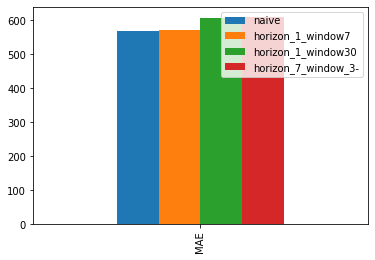

In [124]:
pd.DataFrame(df,index=['MAE']).plot(kind='bar')

In [125]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.516525,
 'MASE': 0.99957}

## Model 4 Conv1D

In [126]:
HORIZON = 1
WINDOW_SIZE =7

In [127]:
# create windowed data
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [128]:
def buat_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON):
    window_sized = np.arange(window_size+horizon)
    index_window = window_sized+np.arange(len(prices)-(window_size+horizon-1)).reshape(-1,1)
    window_fix = prices[index_window]
    window,label = window_fix[:,:window_size],window_fix[:,-horizon:]
    return window,label

In [129]:
x,y=buat_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [130]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows)

(2224, 556)

In [131]:
# to use conv1D : batch_size,timesteps,input_dim

In [132]:
train_windows[0].shape

(7,)

In [133]:
x = tf.constant(train_windows[0])

In [134]:
from tensorflow.keras import layers

In [135]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [136]:
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [137]:
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [138]:
model_4 = Sequential(name='model_4Conv1D')
model_4.add(layers.Lambda(lambda x: tf.expand_dims(x,axis=1)))
model_4.add(layers.Conv1D(128,activation='relu',padding='causal',kernel_size=5,strides=1))
model_4.add(layers.Dense(HORIZON))

model_4.compile(loss='mae',optimizer='adam')


In [139]:
model_4.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_4.name)])

Epoch 1/100
18/18 [==============================] - 3s 36ms/step - loss: 2373.9048 - val_loss: 5913.6226
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 391.7078 - val_loss: 1261.0900
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 209.3953 - val_loss: 1074.7179
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 194.7531 - val_loss: 1041.6313
Epoch 5/100
18/18 [==============================] - 0s 29ms/step - loss: 185.0958 - val_loss: 1031.7551
Epoch 6/100
18/18 [==============================] - 0s 28ms/step - loss: 184.2087 - val_loss: 1029.3267
Epoch 7/100
18/18 [==============================] - 0s 27ms/step - loss: 182.3945 - val_loss: 1001.5028
Epoch 8/100
18/18 [==============================] - 0s 27ms/step - loss: 177.2024 - val_loss: 1000.5951
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 174.5581 - val_loss: 1003.6070
Epoch 10/100
18/18 [==============================] - 0

Epoch 41/100
18/18 [==============================] - 0s 26ms/step - loss: 116.9355 - val_loss: 623.6300
Epoch 42/100
18/18 [==============================] - 0s 27ms/step - loss: 119.0874 - val_loss: 619.0330
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8294 - val_loss: 627.2701
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1608 - val_loss: 634.6339
Epoch 45/100
18/18 [==============================] - 1s 35ms/step - loss: 116.9051 - val_loss: 611.1183
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7334 - val_loss: 626.7640
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 120.4477 - val_loss: 707.7922
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2898 - val_loss: 679.0837
Epoch 49/100
18/18 [==============================] - 0s 26ms/step - loss: 117.0481 - val_loss: 600.6093
Epoch 50/100
18/18 [==============================] - 0s 5ms

In [140]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 632.1910


632.1909790039062

In [141]:
from tensorflow.keras import Model

In [142]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(7))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
x = layers.Conv1D(128,activation='relu',padding='causal',kernel_size=5,strides=1)(x)
outputs = layers.Dense(1)(x)
model_try = Model(inputs,outputs)

In [143]:
model_try.compile(loss='mae',optimizer='adam')

In [144]:
model_try.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_7 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_try.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_4.name)])

In [145]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 632.1910


632.1909790039062

In [148]:
model_4_preds = make_preds(model_4,test_windows)

In [146]:
model_4 = tf.keras.models.load_model("model_experiment/model_4Conv1D/")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 569.7347


569.7347412109375

In [150]:
model_4_results = evaluate_preds(tf.squeeze(test_labels),model_4_preds)

In [151]:
model_4_results

{'MAE': 569.73474,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.5618482,
 'MASE': 1.0008662}

In [152]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.516525,
 'MASE': 0.99957}

## Model 5: RNN (LSTM)

In [155]:
tf.random.set_seed(42)
model_5 = Sequential(name='model_5')
model_5.add(layers.Lambda(lambda x: tf.expand_dims(x,axis=1)))
model_5.add(layers.LSTM(128,activation='relu'))
model_5.add(layers.Dense(1))

model_5.compile(loss='mae',metrics=['accuracy'],optimizer='adam')

In [165]:
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
x = layers.LSTM(128,activation='relu',return_sequences=True)(x)
x = layers.LSTM(128,activation='relu')(x)
x = layers.Dense(32,activation='relu')(x)
outputs = layers.Dense(1)(x)
model_5 = Model(inputs,outputs,name='model_5')

model_5.compile(loss='mae',metrics=['mae'],optimizer='adam')

In [166]:
model_5.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2918.5029 - mae: 2918.5029INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 4s 153ms/step - loss: 2875.5540 - mae: 2875.5540 - val_loss: 13620.0742 - val_mae: 13620.0742
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 1013.9755 - mae: 1013.9755INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 139ms/step - loss: 918.7966 - mae: 918.7966 - val_loss: 1746.8885 - val_mae: 1746.8885
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 262.6417 - mae: 262.6417INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 125ms/step - loss: 255.3156 - mae: 255.3156 - val_loss: 1119.5110 - val_mae: 1119.5110
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 198.5002 - mae: 198.5002 - val_loss: 1122.9869 - val_mae: 1122.9869
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 181.3917 - mae: 181.3917 - val_loss: 1258.1344 - val_mae: 1258.1343
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 218.3880 - mae: 218.3880INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 125ms/step - loss: 217.3841 - mae: 217.3841 - val_loss: 1098.7205 - val_mae: 1098.7205
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 198.9717 - mae: 198.9717INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 3s 148ms/step - loss: 193.4641 - mae: 193.4641 - val_loss: 1058.7927 - val_mae: 1058.7927
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 183.8747 - mae: 183.8747INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 130ms/step - loss: 185.5048 - mae: 185.5048 - val_loss: 1029.8318 - val_mae: 1029.8318
Epoch 9/100
14/18 [======================>.......] - ETA: 0s - loss: 181.6335 - mae: 181.6335INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 131ms/step - loss: 187.1121 - mae: 187.1121 - val_loss: 1021.5370 - val_mae: 1021.5370
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 179.6274 - mae: 179.6274INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 133ms/step - loss: 186.7847 - mae: 186.7847 - val_loss: 1008.1106 - val_mae: 1008.1106
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 178.6390 - mae: 178.6390 - val_loss: 1034.4514 - val_mae: 1034.4514
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 176.4663 - mae: 176.4663 - val_loss: 1120.2516 - val_mae: 1120.2516
Epoch 13/100
18/18 [==============================] - 0s 12ms/step - loss: 175.9056 - mae: 175.9056 - val_loss: 1096.4294 - val_mae: 1096.4294
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 170.0367 - mae: 170.0367INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 3s 148ms/step - loss: 167.7624 - mae: 167.7624 - val_loss: 929.9609 - val_mae: 929.9609
Epoch 15/100
18/18 [==============================] - 0s 16ms/step - loss: 173.1443 - mae: 173.1443 - val_loss: 1103.6666 - val_mae: 1103.6666
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 172.7199 - mae: 172.7199 - val_loss: 1080.2573 - val_mae: 1080.2573
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 161.4872 - mae: 161.4872 - val_loss: 1049.2767 - val_mae: 1049.2767
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 157.9532 - mae: 157.9532 - val_loss: 1001.1401 - val_mae: 1001.1401
Epoch 19/100
14/18 [======================>.......] - ETA: 0s - loss: 153.0993 - mae: 153.0993INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 125ms/step - loss: 150.4510 - mae: 150.4510 - val_loss: 929.3134 - val_mae: 929.3134
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 149.8583 - mae: 149.8583INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 127ms/step - loss: 147.9166 - mae: 147.9166 - val_loss: 803.8445 - val_mae: 803.8445
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 146.3045 - mae: 146.3045INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 3s 148ms/step - loss: 144.8992 - mae: 144.8992 - val_loss: 762.3257 - val_mae: 762.3257
Epoch 22/100
18/18 [==============================] - 0s 15ms/step - loss: 139.1248 - mae: 139.1248 - val_loss: 855.2712 - val_mae: 855.2712
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 138.2703 - mae: 138.2703INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 126ms/step - loss: 140.7372 - mae: 140.7372 - val_loss: 749.1221 - val_mae: 749.1221
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 142.0711 - mae: 142.0711INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 131ms/step - loss: 140.2391 - mae: 140.2391 - val_loss: 726.5942 - val_mae: 726.5942
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 129.9137 - mae: 129.9137INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 3s 153ms/step - loss: 126.7591 - mae: 126.7591 - val_loss: 686.2021 - val_mae: 686.2021
Epoch 26/100
18/18 [==============================] - 0s 11ms/step - loss: 123.6515 - mae: 123.6515 - val_loss: 703.3519 - val_mae: 703.3519
Epoch 27/100
18/18 [==============================] - 0s 11ms/step - loss: 126.8286 - mae: 126.8286 - val_loss: 917.2612 - val_mae: 917.2612
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 146.1976 - mae: 146.1976INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 134ms/step - loss: 141.6601 - mae: 141.6601 - val_loss: 685.4144 - val_mae: 685.4144
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 122.1333 - mae: 122.1333INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 130ms/step - loss: 121.0870 - mae: 121.0870 - val_loss: 647.1138 - val_mae: 647.1138
Epoch 30/100
18/18 [==============================] - 0s 16ms/step - loss: 124.5269 - mae: 124.5269 - val_loss: 655.0502 - val_mae: 655.0502
Epoch 31/100
18/18 [==============================] - 0s 10ms/step - loss: 141.9045 - mae: 141.9045 - val_loss: 650.6709 - val_mae: 650.6709
Epoch 32/100
18/18 [==============================] - 0s 11ms/step - loss: 120.7682 - mae: 120.7682 - val_loss: 728.0540 - val_mae: 728.0540
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 114.2825 - mae: 114.2825INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 3s 152ms/step - loss: 116.0171 - mae: 116.0171 - val_loss: 608.1118 - val_mae: 608.1118
Epoch 34/100
18/18 [==============================] - 0s 16ms/step - loss: 116.4930 - mae: 116.4930 - val_loss: 615.5547 - val_mae: 615.5547
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 118.1282 - mae: 118.1282 - val_loss: 615.0082 - val_mae: 615.0082
Epoch 36/100
18/18 [==============================] - 0s 12ms/step - loss: 114.5624 - mae: 114.5624 - val_loss: 659.0589 - val_mae: 659.0589
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 120.6513 - mae: 120.6513INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 128ms/step - loss: 119.3990 - mae: 119.3990 - val_loss: 594.6495 - val_mae: 594.6495
Epoch 38/100
18/18 [==============================] - 0s 14ms/step - loss: 111.8781 - mae: 111.8781 - val_loss: 667.7733 - val_mae: 667.7733
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7373 - mae: 114.7373 - val_loss: 628.8559 - val_mae: 628.8559
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 114.8331 - mae: 114.8331INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 124ms/step - loss: 114.7887 - mae: 114.7887 - val_loss: 588.9144 - val_mae: 588.9144
Epoch 41/100
18/18 [==============================] - 0s 16ms/step - loss: 112.6445 - mae: 112.6445 - val_loss: 593.5850 - val_mae: 593.5850
Epoch 42/100
18/18 [==============================] - 0s 10ms/step - loss: 128.0735 - mae: 128.0735 - val_loss: 678.6779 - val_mae: 678.6779
Epoch 43/100
18/18 [==============================] - 0s 10ms/step - loss: 122.3775 - mae: 122.3775 - val_loss: 786.3043 - val_mae: 786.3043
Epoch 44/100
18/18 [==============================] - 0s 10ms/step - loss: 120.7775 - mae: 120.7775 - val_loss: 593.9819 - val_mae: 593.9819
Epoch 45/100
18/18 [==============================] - 0s 10ms/step - loss: 110.6469 - mae: 110.6469 - val_loss: 592.9319 - val_mae: 592.9319
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 110.3204 - mae: 110.3204 - val_loss: 711.2012 - val_mae: 711.2012
Epoch 47/100
18/18 [=====

INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 128ms/step - loss: 108.4778 - mae: 108.4778 - val_loss: 587.3065 - val_mae: 587.3065
Epoch 51/100
18/18 [==============================] - 0s 12ms/step - loss: 110.1228 - mae: 110.1228 - val_loss: 602.8280 - val_mae: 602.8280
Epoch 52/100
18/18 [==============================] - 0s 10ms/step - loss: 111.9425 - mae: 111.9425 - val_loss: 610.6999 - val_mae: 610.6999
Epoch 53/100
18/18 [==============================] - 0s 11ms/step - loss: 114.9949 - mae: 114.9949 - val_loss: 637.2376 - val_mae: 637.2376
Epoch 54/100
18/18 [==============================] - 0s 11ms/step - loss: 112.1152 - mae: 112.1152 - val_loss: 600.8710 - val_mae: 600.8710
Epoch 55/100
18/18 [==============================] - 0s 11ms/step - loss: 114.0751 - mae: 114.0751 - val_loss: 614.1237 - val_mae: 614.1237
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 109.0947 - mae: 109.0947 - val_loss: 637.3969 - val_mae: 637.3969
Epoch 57/100
13/18 [=====

INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 3s 149ms/step - loss: 108.0570 - mae: 108.0570 - val_loss: 575.9520 - val_mae: 575.9520
Epoch 58/100
18/18 [==============================] - 0s 13ms/step - loss: 113.0542 - mae: 113.0542 - val_loss: 610.0665 - val_mae: 610.0665
Epoch 59/100
18/18 [==============================] - 0s 13ms/step - loss: 107.5941 - mae: 107.5941 - val_loss: 624.9523 - val_mae: 624.9523
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2817 - mae: 115.2817 - val_loss: 579.2303 - val_mae: 579.2303
Epoch 61/100
18/18 [==============================] - 0s 11ms/step - loss: 113.5011 - mae: 113.5011 - val_loss: 592.5335 - val_mae: 592.5335
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 114.3766 - mae: 114.3766 - val_loss: 700.0352 - val_mae: 700.0352
Epoch 63/100
18/18 [==============================] - 0s 10ms/step - loss: 112.8740 - mae: 112.8740 - val_loss: 592.1710 - val_mae: 592.1710
Epoch 64/100
18/18 [=====

INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 126ms/step - loss: 117.7030 - mae: 117.7030 - val_loss: 573.5165 - val_mae: 573.5165
Epoch 66/100
18/18 [==============================] - 0s 14ms/step - loss: 108.3530 - mae: 108.3530 - val_loss: 574.9173 - val_mae: 574.9173
Epoch 67/100
18/18 [==============================] - 0s 11ms/step - loss: 110.8039 - mae: 110.8039 - val_loss: 661.0125 - val_mae: 661.0125
Epoch 68/100
15/18 [========================>.....] - ETA: 0s - loss: 111.2903 - mae: 111.2903INFO:tensorflow:Assets written to: model_experiment\model_5\assets


INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 2s 125ms/step - loss: 111.3048 - mae: 111.3048 - val_loss: 572.4995 - val_mae: 572.4995
Epoch 69/100
18/18 [==============================] - 0s 15ms/step - loss: 118.6899 - mae: 118.6899 - val_loss: 616.6113 - val_mae: 616.6113
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - loss: 114.1476 - mae: 114.1476 - val_loss: 588.6205 - val_mae: 588.6205
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 116.3503 - mae: 116.3503 - val_loss: 584.5366 - val_mae: 584.5366
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 129.3549 - mae: 129.3549 - val_loss: 724.1111 - val_mae: 724.1111
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 115.0725 - mae: 115.0725 - val_loss: 602.5539 - val_mae: 602.5539
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 115.0649 - mae: 115.0649 - val_loss: 573.0742 - val_mae: 573.0742
Epoch 75/100
18/18 [=====

INFO:tensorflow:Assets written to: model_experiment\model_5\assets


18/18 [==============================] - 3s 149ms/step - loss: 106.8417 - mae: 106.8417 - val_loss: 568.2491 - val_mae: 568.2491
Epoch 91/100
18/18 [==============================] - 0s 14ms/step - loss: 110.7591 - mae: 110.7591 - val_loss: 635.3989 - val_mae: 635.3989
Epoch 92/100
18/18 [==============================] - 0s 11ms/step - loss: 117.5803 - mae: 117.5803 - val_loss: 759.8276 - val_mae: 759.8276
Epoch 93/100
18/18 [==============================] - 0s 11ms/step - loss: 118.8411 - mae: 118.8411 - val_loss: 637.5815 - val_mae: 637.5815
Epoch 94/100
18/18 [==============================] - 0s 11ms/step - loss: 114.5182 - mae: 114.5182 - val_loss: 630.8237 - val_mae: 630.8237
Epoch 95/100
18/18 [==============================] - 0s 11ms/step - loss: 107.5667 - mae: 107.5667 - val_loss: 574.4421 - val_mae: 574.4421
Epoch 96/100
18/18 [==============================] - 0s 11ms/step - loss: 108.2801 - mae: 108.2801 - val_loss: 587.1740 - val_mae: 587.1740
Epoch 97/100
18/18 [=====

In [167]:
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 575.5864 - mae: 575.5864


[575.5863647460938, 575.5863647460938]

In [168]:
from tensorflow.keras.models import load_model

In [169]:
model_5 = load_model("model_experiment/model_5/")

In [170]:
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 568.2491 - mae: 568.2491


[568.2491455078125, 568.2491455078125]

In [172]:
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8858.622, 8773.998, 9020.758, 8797.527, 8731.576], dtype=float32)>

In [173]:
model_5_results = evaluate_preds(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'MAE': 568.24915,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.5552742,
 'MASE': 0.9982564}

In [174]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.516525,
 'MASE': 0.99957}

## Add data with multivariate time series dataset

* misal tweet elon musk untuk menaikan harga bitcoin

* memprediksi dengan bitcoin halving

In [15]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [15]:
import numpy as np

In [20]:
block_reward_1 = 50 #3 january 2009
block_reward_2 = 25 #8 Nov 2012
block_reward_3 = 12.5 #9 July 2016
block_reward_4 = 6.25 #18 May 2020

# block reward dates

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [21]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [22]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [23]:
# create data range
block_reward_2_days = (block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [24]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

In [25]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [20]:
bitcoin_prices_block['block_reward'].values

array([25, 25, 25, ..., 6.25, 6.25, 6.25], dtype=object)

In [25]:
np.sum(np.array(block_size) ==bitcoin_prices_block['block_reward'].values)

NameError: name 'block_size' is not defined

In [26]:
bitcoin_prices_block.shape

(2787, 2)

In [27]:
block_reward_2_days

1012

In [28]:
block_size = []
for i in bitcoin_prices.index:
    if i >= block_reward_2_datetime and i < block_reward_3_datetime:
        block_size.append(block_reward_2)
    elif i >= block_reward_3_datetime and i < block_reward_4_datetime:
        block_size.append(block_reward_3)
    elif i >= block_reward_4_datetime :
        block_size.append(block_reward_4)
    else:
        block_size.append(3.12)
        
        

In [29]:
block_size[:10]

[25, 25, 25, 25, 25, 25, 25, 25, 25, 25]

In [30]:
len(block_size),len(bitcoin_prices.index)

(2787, 2787)

In [31]:
bitcoin_prices.index[0] > block_reward_2_datetime

True

In [32]:
minmax_scale(bitcoin_prices_block[['Price',"block_reward"]])

NameError: name 'minmax_scale' is not defined

<AxesSubplot:xlabel='Date'>

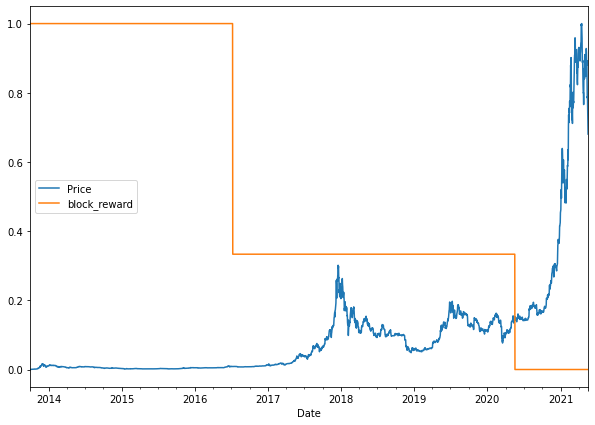

In [21]:
# plot the block reward vs price over ime
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price',"block_reward"]]),
                                                 columns=bitcoin_prices_block.columns,
                                                 index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

## making a windowed dataset with pandas



In [81]:
# setup dataset hyperparameters

In [22]:
HORIZON =1
WINDOW_SIZE=7

In [26]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price={i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed[:10]

,Price,block_reward,Price=1,Price=2,Price=3,Price=4,Price=5,Price=6,Price=7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [27]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price=1,Price=2,Price=3,Price=4,Price=5,Price=6,Price=7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [28]:
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [35]:
X.head()

,block_reward,Price=1,Price=2,Price=3,Price=4,Price=5,Price=6,Price=7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [36]:
X.values.shape

(2780, 8)

In [24]:
# mak train test split

split_size = int(len(X)*0.8)

X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]

len(X_train),len(y_test)

NameError: name 'X' is not defined

In [44]:
X_train.values[0]

array([ 25.     , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
       125.455  , 123.65499], dtype=float32)

In [38]:

from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [54]:
tf.random.set_seed(42)

model_6 = Sequential(name='model_6_multivariate')
model_6.add(layers.Dense(128,activation='relu'))
model_6.add(layers.Dense(1))

model_6.compile(loss='mae',optimizer='adam',metrics=['mae'])

model_6.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=(X_test,y_test),
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 2s 33ms/step - loss: 1234.6804 - mae: 1234.6804 - val_loss: 2061.9077 - val_mae: 2061.9077
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 351.5053 - mae: 351.5053 - val_loss: 1908.6733 - val_mae: 1908.6733
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 235.4153 - mae: 235.4153 - val_loss: 1329.0585 - val_mae: 1329.0585
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 208.6112 - mae: 208.6112 - val_loss: 1102.1342 - val_mae: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 196.5770 - mae: 196.5770 - val_loss: 1107.8474 - val_mae: 1107.8474
Epoch 6/100
18/18 [==============================] - 0s 22ms/step - loss: 187.2245 - mae: 187.2245 - val_loss: 1036.1720 - val_mae: 1036.1720
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 182.0245 - mae: 182.0245 - val_loss: 1019.2928 - val_mae: 1019.2928
Epoch

Epoch 32/100
18/18 [==============================] - 0s 22ms/step - loss: 116.9750 - mae: 116.9750 - val_loss: 617.1061 - val_mae: 617.1061
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2438 - mae: 115.2438 - val_loss: 649.0989 - val_mae: 649.0989
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5187 - mae: 114.5187 - val_loss: 632.1375 - val_mae: 632.1375
Epoch 35/100
18/18 [==============================] - 0s 24ms/step - loss: 113.6357 - mae: 113.6357 - val_loss: 607.4173 - val_mae: 607.4173
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2605 - mae: 115.2605 - val_loss: 626.4319 - val_mae: 626.4319
Epoch 37/100
18/18 [==============================] - 0s 21ms/step - loss: 113.7020 - mae: 113.7020 - val_loss: 606.2318 - val_mae: 606.2318
Epoch 38/100
18/18 [==============================] - 0s 24ms/step - loss: 111.4061 - mae: 111.4061 - val_loss: 603.2919 - val_mae: 603.2919
Epoch 39/100
18/

Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2309 - mae: 106.2309 - val_loss: 572.2830 - val_mae: 572.2830
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 105.8568 - mae: 105.8568 - val_loss: 596.5461 - val_mae: 596.5461
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8418 - mae: 107.8418 - val_loss: 577.2400 - val_mae: 577.2400
Epoch 81/100
18/18 [==============================] - 0s 21ms/step - loss: 105.1101 - mae: 105.1101 - val_loss: 568.4897 - val_mae: 568.4897
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1867 - mae: 114.1867 - val_loss: 592.5609 - val_mae: 592.5609
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9631 - mae: 107.9631 - val_loss: 651.6213 - val_mae: 651.6213
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6690 - mae: 109.6690 - val_loss: 568.9340 - val_mae: 568.9340
Epoch 85/100
18/18 

In [57]:
# Evaluate
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 626.7440 - mae: 626.7440


[626.7440185546875, 626.7440185546875]

In [35]:
model_6 = load_model("model_experiment/model_6_multivariate/")

In [36]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 1s 2ms/step - loss: 567.8899 - mae: 567.8899


[567.889892578125, 567.889892578125]

In [38]:
# make pred

model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_error

In [50]:
# Evaluate pred to get eval metrics

model_6_results = evaluate_preds(y_test,model_6_preds)
model_6_results

{'mae': 567.8899,
 'mse': 1164816.6,
 'rmse': 1079.2667,
 'mape': 2.5460758,
 'mase': 0.99762523}

## Model 7: N-beats algorithm

### Build N-Beats block layer
* karen block layer tidak ada di layer maka pakai subclassing layer

In [58]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size:int,
                theta_size:int,
                horizon:int,
                n_neurons:int,
                n_layers:int,
                **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contatins stack of 4 full connect layers each relu activation
        
        self.hidden = [tf.keras.layers.Dense(n_neurons,activation='relu') for i in range(n_layers)]
        #output of block is theta layer iwht linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation='linear',name='theta')
        
    def call(self,inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # output the backcast and the forecast from theta
        
        backcast, forecast = theta[:, :self.input_size], theta[:,-self.horizon:]
        
        return backcast, forecast
        
    

### Test inputs and outputs

In [59]:
# set up dummy NBeatsBlock layer
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size=WINDOW_SIZE+HORIZON,
                                      horizon = HORIZON,
                                      n_neurons=128,
                                      n_layers=4)

### Create dummy inputs 

In [60]:
tf.range(WINDOW_SIZE)+1

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7])>

In [61]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs.shape

TensorShape([1, 7])

In [62]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [63]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [64]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast:{backcast.numpy()}")
print(f"Forecast:{forecast.numpy()}")

Backcast:[[ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
  -0.6396662 ]]
Forecast:[[1.0071648]]


In [65]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

Backcast:[ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast:1.0071648359298706


### Preparing data for the N-beats algorithm using tf.data

*pake data pipeline untuk best practice

In [66]:
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
# create data pipeline inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [75]:
# add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [76]:
# mak features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# make train and test sets
split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train),len(X_test)

(2224, 556)

In [78]:
# Time to make our dataset performan using tf.data API

train_feautres_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labeles_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_feautres_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labeles_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#Combine labels and features by zipping

train_dataset = tf.data.Dataset.zip((train_feautres_dataset,train_labeles_dataset))
test_dataset = tf.data.Dataset.zip((test_feautres_dataset,test_labeles_dataset))

# Batch and prefetch
BATCH_SIZE = 1024

train_dataset= train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset= test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters

In [57]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE*HORIZON
THETA_SIZE = INPUT_SIZE +HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### membutuhkan 2 layer tambahan untuk residual koneksi (subtract and add)

In [58]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

# subtract
subtacted = layers.subtract([tensor_1,tensor_2])

# added
added = layers.add([tensor_1,tensor_2])

### Building model

In [62]:
%%time
tf.random.set_seed(42)
#1. setip and instance of NBeatsBlock



nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON,
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                name='initialBlock')

# 2. Create input to stack
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE),name='stack_input')

# 3. Create initial backcast and forecast input (backc=wards pred + horzion pred)
backcast, forecast = nbeats_block_layer(stack_input)

#residuals, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 
#4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):
    #5 use the n beats block to caclulate 
    backcast,block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                      theta_size = THETA_SIZE,
                                      horizon = HORIZON,
                                      n_neurons = N_NEURONS,
                                      n_layers = N_LAYERS,
                                    name=f'NBeatsBlock_{i}')(residuals)
    residuals = layers.subtract([residuals,backcast],name=f'subtract_{i}')
    forecast = layers.add([forecast,block_forecast],name=f"add_{i}")

#6. Put the stack model together

model_7 = tf.keras.Model(inputs=stack_input,outputs=forecast,name='model_7_beats')

#7 compile model

model_7.compile(loss='mae',optimizer='adam',metrics=['mae'])

model_7.fit(train_dataset,
           epochs=N_EPOCHS,
           validation_data=test_dataset,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200,restore_best_weights=True),
                     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=100,verbose=1)])

   

Epoch 1/5000
3/3 [==============================] - 9s 796ms/step - loss: 39965.1328 - mae: 39965.1328 - val_loss: 7229.5254 - val_mae: 7229.5254 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 149ms/step - loss: 7403.0356 - mae: 7403.0356 - val_loss: 6877.1313 - val_mae: 6877.1313 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 151ms/step - loss: 726.6044 - mae: 726.6044 - val_loss: 1638.0896 - val_mae: 1638.0896 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 146ms/step - loss: 895.4393 - mae: 895.4393 - val_loss: 1254.0649 - val_mae: 1254.0649 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 146ms/step - loss: 540.3207 - mae: 540.3207 - val_loss: 1029.8821 - val_mae: 1029.8821 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 69ms/step - loss: 440.8030 - mae: 440.8030 - val_loss: 2337.2297 - val_mae: 2337.2297 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 86ms/step 

3/3 [==============================] - 0s 81ms/step - loss: 120.1055 - mae: 120.1055 - val_loss: 623.0635 - val_mae: 623.0635 - lr: 0.0010
Epoch 108/5000
3/3 [==============================] - 0s 81ms/step - loss: 116.1826 - mae: 116.1826 - val_loss: 653.3371 - val_mae: 653.3371 - lr: 0.0010
Epoch 109/5000
3/3 [==============================] - 0s 70ms/step - loss: 108.2681 - mae: 108.2681 - val_loss: 613.2581 - val_mae: 613.2581 - lr: 0.0010
Epoch 110/5000
3/3 [==============================] - 0s 160ms/step - loss: 105.4800 - mae: 105.4800 - val_loss: 600.5476 - val_mae: 600.5476 - lr: 0.0010
Epoch 111/5000
3/3 [==============================] - 0s 157ms/step - loss: 105.0348 - mae: 105.0348 - val_loss: 596.6651 - val_mae: 596.6651 - lr: 0.0010
Epoch 112/5000
3/3 [==============================] - 0s 86ms/step - loss: 118.1175 - mae: 118.1175 - val_loss: 609.3514 - val_mae: 609.3514 - lr: 0.0010
Epoch 113/5000
3/3 [==============================] - 0s 71ms/step - loss: 137.6308 - mae

3/3 [==============================] - 0s 78ms/step - loss: 108.5193 - mae: 108.5193 - val_loss: 616.1448 - val_mae: 616.1448 - lr: 0.0010
Epoch 214/5000
3/3 [==============================] - 0s 74ms/step - loss: 126.0610 - mae: 126.0610 - val_loss: 644.3051 - val_mae: 644.3051 - lr: 0.0010
Epoch 215/5000
3/3 [==============================] - 0s 75ms/step - loss: 119.4647 - mae: 119.4647 - val_loss: 626.2604 - val_mae: 626.2604 - lr: 0.0010
Epoch 216/5000
3/3 [==============================] - 0s 71ms/step - loss: 120.8368 - mae: 120.8368 - val_loss: 656.5312 - val_mae: 656.5312 - lr: 0.0010
Epoch 217/5000
3/3 [==============================] - 0s 87ms/step - loss: 107.8688 - mae: 107.8688 - val_loss: 617.3557 - val_mae: 617.3557 - lr: 0.0010
Epoch 218/5000
3/3 [==============================] - 0s 73ms/step - loss: 114.0570 - mae: 114.0570 - val_loss: 593.0430 - val_mae: 593.0430 - lr: 0.0010
Epoch 219/5000
3/3 [==============================] - 0s 77ms/step - loss: 116.4055 - mae: 

3/3 [==============================] - 0s 72ms/step - loss: 87.8619 - mae: 87.8619 - val_loss: 610.5778 - val_mae: 610.5778 - lr: 1.0000e-04
Epoch 266/5000
3/3 [==============================] - 0s 79ms/step - loss: 87.6584 - mae: 87.6584 - val_loss: 610.5273 - val_mae: 610.5273 - lr: 1.0000e-04
Epoch 267/5000
3/3 [==============================] - 0s 88ms/step - loss: 87.3693 - mae: 87.3693 - val_loss: 610.8731 - val_mae: 610.8731 - lr: 1.0000e-04
Epoch 268/5000
3/3 [==============================] - 0s 71ms/step - loss: 87.1800 - mae: 87.1800 - val_loss: 610.8865 - val_mae: 610.8865 - lr: 1.0000e-04
Epoch 269/5000
3/3 [==============================] - 0s 72ms/step - loss: 86.9925 - mae: 86.9925 - val_loss: 610.8139 - val_mae: 610.8139 - lr: 1.0000e-04
Epoch 270/5000
3/3 [==============================] - 0s 72ms/step - loss: 86.7340 - mae: 86.7340 - val_loss: 610.8435 - val_mae: 610.8435 - lr: 1.0000e-04
Epoch 271/5000
3/3 [==============================] - 0s 74ms/step - loss: 86.5

Epoch 318/5000
3/3 [==============================] - 0s 71ms/step - loss: 79.8986 - mae: 79.8986 - val_loss: 626.4229 - val_mae: 626.4229 - lr: 1.0000e-04
Epoch 319/5000
3/3 [==============================] - 0s 73ms/step - loss: 79.7177 - mae: 79.7177 - val_loss: 627.0131 - val_mae: 627.0131 - lr: 1.0000e-04
Epoch 320/5000
3/3 [==============================] - 0s 72ms/step - loss: 79.5908 - mae: 79.5908 - val_loss: 627.0596 - val_mae: 627.0596 - lr: 1.0000e-04
Epoch 321/5000
3/3 [==============================] - 0s 73ms/step - loss: 79.7115 - mae: 79.7115 - val_loss: 628.1502 - val_mae: 628.1502 - lr: 1.0000e-04
Epoch 322/5000
3/3 [==============================] - 0s 72ms/step - loss: 79.8192 - mae: 79.8192 - val_loss: 629.1234 - val_mae: 629.1234 - lr: 1.0000e-04
Epoch 323/5000
3/3 [==============================] - 0s 73ms/step - loss: 79.4911 - mae: 79.4911 - val_loss: 628.1175 - val_mae: 628.1175 - lr: 1.0000e-04
Epoch 324/5000
3/3 [==============================] - 0s 73ms/st

In [63]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 148ms/step - loss: 583.9232 - mae: 583.9232


[583.9231567382812, 583.9231567382812]

In [69]:
model_7_preds = make_preds(model_7,test_dataset)

In [78]:
model_7_results = evaluate_preds(y_test,model_7_preds)

In [79]:
model_7_results

{'mae': 583.92316,
 'mse': 1209093.6,
 'rmse': 1099.5879,
 'mape': 2.6407816,
 'mase': 1.0257913}

## plotting n-beats

In [80]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model_7)

In [18]:
#model_custom.save("n_beats_custom.h5")

## Model 8: Ensemble model(stacking diffrent models togehter)

In [19]:
HORIZON,WINDOW_SIZE = 1,7

### Constructing and fitting ensemble of models (using diffrent loss functions)

In [34]:
def get_ensemble_models(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data = test_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fns=["mae","mse","mape"]):
    ensemble_models = []
    
    for i in range(num_iter):
        # build and fit a new model diffrent loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs, model number:{i}")
            
            # Construct a simple model (model_1)
            model = tf.keras.Sequential([
                # initialise dense layer with normal distribution
                layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                layers.Dense(HORIZON)
            ])
            
            model.compile(loss=loss_function,metrics=["mae","mse"],optimizer='adam')
            
            # fit the current model
            model.fit(train_data,
                      epochs=num_epochs,
                     verbose=0,
                     validation_data=test_data,
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=200,restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=100,verbose=1)])
            
            ensemble_models.append(model)
            
        return ensemble_models

In [79]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [80]:
%%time
ensemble_models=get_ensemble_models(num_iter=5,num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00911: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00266: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00366: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00110: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00425: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00525: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00509: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00687: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00787: ReduceLROnPlateau reducing learning rate to 1.000000065687345

In [40]:
len(ensemble_models)

15

### Make predictions with ensemble model

In [84]:
def make_ensemble_preds(ensemble_models,data):
    ensemble_preds = []
    
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [85]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models,test_dataset)

Wall time: 980 ms


In [86]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.mean(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 568.9462,
 'mse': 1143090.0,
 'rmse': 1069.1539,
 'mape': 2.569465,
 'mase': 0.99948096}

### Ploting the prediction

In [87]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8870.459,  8763.768,  9066.929, ..., 49560.09 , 48140.2  ,
        45382.312],
       [ 8720.974,  8733.402,  9035.373, ..., 49849.91 , 48443.043,
        46787.63 ],
       [ 8743.961,  8750.412,  9028.345, ..., 49428.945, 48374.117,
        47267.137],
       ...,
       [ 8778.153,  8767.032,  9076.592, ..., 49762.16 , 48875.082,
        46369.434],
       [ 8751.562,  8791.237,  9071.208, ..., 50630.902, 48201.07 ,
        45861.695],
       [ 8762.075,  8796.689,  9061.249, ..., 49906.26 , 48029.05 ,
        45856.23 ]], dtype=float32)>

In [54]:
tf.math.reduce_std(ensemble_preds,axis=0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 23.65139  ,  33.722916 ,  46.070866 ,  40.22268  ,  40.456413 ,
        43.319244 ,  24.817781 ,  36.262413 ,  33.949547 ,  21.584349 ,
        22.312204 ,  31.912865 ,  33.14071  ,  43.757206 ,  54.40727  ,
        46.347042 ,  48.44715  ,  57.58317  ,  42.222424 ,  52.72699  ,
        41.874233 ,  50.910576 ,  39.53033  ,  35.96361  ,  29.608255 ,
        22.278652 ,  28.054306 ,  33.177708 ,  29.905691 ,  22.598442 ,
        18.622072 ,  14.473409 ,  22.09645  ,  16.78873  ,  23.49172  ,
        24.067537 ,  18.044767 ,  17.628466 ,  13.878993 ,  29.087751 ,
        51.62225  ,  64.85775  ,  68.4564   ,  48.119278 ,  38.936947 ,
        55.324528 ,  21.98801  ,  13.821814 ,  18.28641  ,  15.141184 ,
        18.002317 ,  17.654737 ,  15.9929285,  14.290278 ,  17.925495 ,
        11.83382  ,  28.276262 ,  34.593323 ,  32.235855 ,  30.740591 ,
        35.7492   ,  36.89234  ,  35.445023 ,  34.52259  ,  45.331394 ,
        35.09930

In [88]:
def get_upper_lower(preds): #1. take predictions from a number randomly intilized
    # Measuure the standard deviation
    std = tf.math.reduce_std(preds,axis=0)
    
    interval = std*1.96
    
    preds_mean = tf.reduce_mean(preds,axis=0)
    
    lower, upper = preds_mean - interval, preds_mean +interval
    
    return lower,upper

In [90]:
lower,upper = get_upper_lower(ensemble_preds)

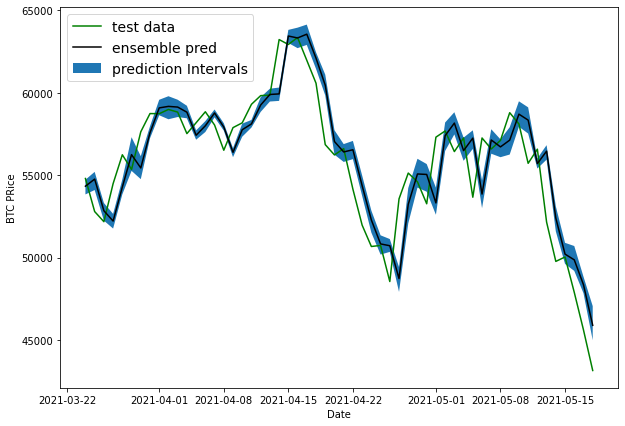

In [104]:
# get the median/mean values
ensemble_median = np.median(ensemble_preds,axis=0)

#plot the median
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],'g',label='test data')
plt.plot(X_test.index[offset:],ensemble_median[offset:],'k',label='ensemble pred')
plt.xlabel("Date")
plt.ylabel("BTC PRice")

plt.fill_between(X_test.index[offset:],
                (lower)[offset:],
                (upper)[offset:],label='prediction Intervals')
plt.legend(loc="upper left",fontsize=14)

### analyse plot

1. what can my model know?
2. what doesn't my model know?

## Model 9: Futrue prediction

In [107]:
HORIZON = 1
WINDO_SIZE = 7

In [106]:
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [108]:
bitcoin_prices_nbeats.tail()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [133]:
X_all = bitcoin_prices_nbeats.dropna().drop("Price",axis=1).to_numpy()
y_all = bitcoin_prices_nbeats.dropna()["Price"]

In [132]:
X_all.to_numpy()

array([[  121.795     ,   120.65533   ,   121.33866   , ...,
          108.58483   ,   125.455     ,   123.65499   ],
       [  123.033     ,   121.795     ,   120.65533   , ...,
          118.67466   ,   108.58483   ,   125.455     ],
       [  124.049     ,   123.033     ,   121.795     , ...,
          121.33866   ,   118.67466   ,   108.58483   ],
       ...,
       [50032.69313676, 49764.1320816 , 52147.82118698, ...,
        55715.54665129, 58102.19142623, 58788.20967893],
       [47885.62525472, 50032.69313676, 49764.1320816 , ...,
        56573.5554719 , 55715.54665129, 58102.19142623],
       [45604.61575361, 47885.62525472, 50032.69313676, ...,
        52147.82118698, 56573.5554719 , 55715.54665129]])

In [138]:
train = tf.data.Dataset.from_tensor_slices(X_all)
label = tf.data.Dataset.from_tensor_slices(y_all)

train_dataset_future = tf.data.Dataset.zip((train,label))

train_dataset_future = train_dataset_future.batch(1024).prefetch(tf.data.AUTOTUNE)

In [142]:
train_dataset

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [139]:
model_9 =tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(1)
],name='model_9_futurePredict')
model_9.compile(loss='mae',metrics=['mae','mse'],optimizer='adam')



In [140]:
model_9.fit(train_dataset_future,
           epochs=500,
           callbacks=[tf.keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True),
                     tf.keras.callbacks.ReduceLROnPlateau(patience=100),
                     ])

Epoch 1/500
3/3 [==============================] - 0s 7ms/step - loss: 4789.2661 - mae: 4789.2661 - mse: 80645904.0000 - lr: 0.0010
Epoch 2/500
3/3 [==============================] - 0s 22ms/step - loss: 2853.6287 - mae: 2853.6287 - mse: 28402378.0000 - lr: 0.0010
Epoch 3/500
3/3 [==============================] - 0s 24ms/step - loss: 947.8903 - mae: 947.8902 - mse: 3196516.5000 - lr: 0.0010
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 918.0382 - mae: 918.0383 - mse: 4692064.5000 - lr: 0.0010
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 1287.6143 - mae: 1287.6143 - mse: 7205547.5000 - lr: 0.0010
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 850.8937 - mae: 850.8937 - mse: 3221490.0000 - lr: 0.0010
Epoch 7/500
3/3 [==============================] - 0s 7ms/step - loss: 377.1281 - mae: 377.1281 - mse: 866807.0000 - lr: 0.0010
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 615.2404 - mae: 

3/3 [==============================] - 0s 6ms/step - loss: 361.6545 - mae: 361.6545 - mse: 846603.6875 - lr: 0.0010
Epoch 18/500
3/3 [==============================] - 0s 7ms/step - loss: 333.9923 - mae: 333.9923 - mse: 743195.9375 - lr: 0.0010
Epoch 19/500
3/3 [==============================] - 0s 8ms/step - loss: 333.5009 - mae: 333.5009 - mse: 722435.2500 - lr: 0.0010
Epoch 20/500
3/3 [==============================] - 0s 7ms/step - loss: 312.1475 - mae: 312.1475 - mse: 669910.5625 - lr: 0.0010
Epoch 21/500
3/3 [==============================] - 0s 6ms/step - loss: 308.1174 - mae: 308.1174 - mse: 643873.6875 - lr: 0.0010
Epoch 22/500
3/3 [==============================] - 0s 8ms/step - loss: 297.8065 - mae: 297.8065 - mse: 596064.6250 - lr: 0.0010
Epoch 23/500
3/3 [==============================] - 0s 7ms/step - loss: 286.2324 - mae: 286.2324 - mse: 562682.8125 - lr: 0.0010
Epoch 24/500
3/3 [==============================] - 0s 7ms/step - loss: 286.1642 - mae: 286.1642 - mse: 558792

3/3 [==============================] - 0s 8ms/step - loss: 244.8798 - mae: 244.8798 - mse: 413034.4375 - lr: 0.0010
Epoch 35/500
3/3 [==============================] - 0s 6ms/step - loss: 242.1519 - mae: 242.1519 - mse: 406218.6250 - lr: 0.0010
Epoch 36/500
3/3 [==============================] - 0s 7ms/step - loss: 239.9705 - mae: 239.9704 - mse: 397443.3125 - lr: 0.0010
Epoch 37/500
3/3 [==============================] - 0s 6ms/step - loss: 237.6540 - mae: 237.6540 - mse: 390679.1562 - lr: 0.0010
Epoch 38/500
3/3 [==============================] - 0s 8ms/step - loss: 235.8504 - mae: 235.8504 - mse: 386343.0312 - lr: 0.0010
Epoch 39/500
3/3 [==============================] - 0s 7ms/step - loss: 233.8630 - mae: 233.8630 - mse: 379208.2812 - lr: 0.0010
Epoch 40/500
3/3 [==============================] - 0s 6ms/step - loss: 231.9586 - mae: 231.9586 - mse: 374900.2812 - lr: 0.0010
Epoch 41/500
3/3 [==============================] - 0s 8ms/step - loss: 230.5336 - mae: 230.5336 - mse: 370300

3/3 [==============================] - 0s 6ms/step - loss: 232.5289 - mae: 232.5289 - mse: 364594.0000 - lr: 0.0010
Epoch 68/500
3/3 [==============================] - 0s 6ms/step - loss: 231.1362 - mae: 231.1362 - mse: 371155.3438 - lr: 0.0010
Epoch 69/500
3/3 [==============================] - 0s 5ms/step - loss: 234.8769 - mae: 234.8769 - mse: 367554.6562 - lr: 0.0010
Epoch 70/500
3/3 [==============================] - 0s 7ms/step - loss: 244.5825 - mae: 244.5825 - mse: 405554.7812 - lr: 0.0010
Epoch 71/500
3/3 [==============================] - 0s 7ms/step - loss: 242.9574 - mae: 242.9574 - mse: 385348.3750 - lr: 0.0010
Epoch 72/500
3/3 [==============================] - 0s 7ms/step - loss: 245.3352 - mae: 245.3352 - mse: 408968.4688 - lr: 0.0010
Epoch 73/500
3/3 [==============================] - 0s 5ms/step - loss: 237.6073 - mae: 237.6073 - mse: 373940.2500 - lr: 0.0010
Epoch 74/500
3/3 [==============================] - 0s 5ms/step - loss: 238.7020 - mae: 238.7020 - mse: 390244

3/3 [==============================] - 0s 8ms/step - loss: 224.9507 - mae: 224.9507 - mse: 354027.9375 - lr: 0.0010
Epoch 85/500
3/3 [==============================] - 0s 8ms/step - loss: 229.7346 - mae: 229.7346 - mse: 353267.5625 - lr: 0.0010
Epoch 86/500
3/3 [==============================] - 0s 9ms/step - loss: 242.2437 - mae: 242.2437 - mse: 397989.3438 - lr: 0.0010
Epoch 87/500
3/3 [==============================] - 0s 7ms/step - loss: 239.3133 - mae: 239.3133 - mse: 374364.9688 - lr: 0.0010
Epoch 88/500
3/3 [==============================] - 0s 9ms/step - loss: 240.4263 - mae: 240.4263 - mse: 394619.1250 - lr: 0.0010
Epoch 89/500
3/3 [==============================] - 0s 8ms/step - loss: 229.6560 - mae: 229.6560 - mse: 354538.2500 - lr: 0.0010
Epoch 90/500
3/3 [==============================] - 0s 7ms/step - loss: 230.5729 - mae: 230.5729 - mse: 367579.5938 - lr: 0.0010
Epoch 91/500
3/3 [==============================] - 0s 6ms/step - loss: 228.8661 - mae: 228.8661 - mse: 351612

3/3 [==============================] - 0s 7ms/step - loss: 226.9642 - mae: 226.9642 - mse: 346083.1250 - lr: 0.0010
Epoch 118/500
3/3 [==============================] - 0s 6ms/step - loss: 230.1165 - mae: 230.1165 - mse: 364245.0000 - lr: 0.0010
Epoch 119/500
3/3 [==============================] - 0s 7ms/step - loss: 226.4107 - mae: 226.4107 - mse: 344781.2812 - lr: 0.0010
Epoch 120/500
3/3 [==============================] - 0s 6ms/step - loss: 230.4932 - mae: 230.4932 - mse: 364968.7812 - lr: 0.0010
Epoch 121/500
3/3 [==============================] - 0s 6ms/step - loss: 226.8212 - mae: 226.8212 - mse: 345493.1875 - lr: 0.0010
Epoch 122/500
3/3 [==============================] - 0s 8ms/step - loss: 231.7458 - mae: 231.7458 - mse: 368026.0000 - lr: 0.0010
Epoch 123/500
3/3 [==============================] - 0s 7ms/step - loss: 227.1219 - mae: 227.1219 - mse: 346039.5312 - lr: 0.0010
Epoch 124/500
3/3 [==============================] - 0s 8ms/step - loss: 231.8553 - mae: 231.8553 - mse:

3/3 [==============================] - 0s 5ms/step - loss: 230.3591 - mae: 230.3591 - mse: 364015.3438 - lr: 0.0010
Epoch 135/500
3/3 [==============================] - 0s 5ms/step - loss: 225.5120 - mae: 225.5120 - mse: 342050.4062 - lr: 0.0010
Epoch 136/500
3/3 [==============================] - 0s 7ms/step - loss: 230.7664 - mae: 230.7664 - mse: 364944.7500 - lr: 0.0010
Epoch 137/500
3/3 [==============================] - 0s 5ms/step - loss: 224.6341 - mae: 224.6341 - mse: 340492.0312 - lr: 0.0010
Epoch 138/500
3/3 [==============================] - 0s 6ms/step - loss: 229.6881 - mae: 229.6880 - mse: 362052.0625 - lr: 0.0010
Epoch 139/500
3/3 [==============================] - 0s 6ms/step - loss: 224.4623 - mae: 224.4623 - mse: 339927.4688 - lr: 0.0010
Epoch 140/500
3/3 [==============================] - 0s 6ms/step - loss: 228.4590 - mae: 228.4590 - mse: 358993.1250 - lr: 0.0010
Epoch 141/500
3/3 [==============================] - 0s 6ms/step - loss: 224.5036 - mae: 224.5036 - mse:

3/3 [==============================] - 0s 6ms/step - loss: 222.6428 - mae: 222.6428 - mse: 334368.5625 - lr: 0.0010
Epoch 168/500
3/3 [==============================] - 0s 6ms/step - loss: 225.7722 - mae: 225.7722 - mse: 350552.8438 - lr: 0.0010
Epoch 169/500
3/3 [==============================] - 0s 7ms/step - loss: 223.8894 - mae: 223.8894 - mse: 336374.0625 - lr: 0.0010
Epoch 170/500
3/3 [==============================] - 0s 7ms/step - loss: 229.1958 - mae: 229.1958 - mse: 358444.5312 - lr: 0.0010
Epoch 171/500
3/3 [==============================] - 0s 7ms/step - loss: 226.9446 - mae: 226.9446 - mse: 342568.5625 - lr: 0.0010
Epoch 172/500
3/3 [==============================] - 0s 7ms/step - loss: 226.8330 - mae: 226.8330 - mse: 352992.5000 - lr: 0.0010
Epoch 173/500
3/3 [==============================] - 0s 6ms/step - loss: 222.2139 - mae: 222.2139 - mse: 333174.4062 - lr: 0.0010
Epoch 174/500
3/3 [==============================] - 0s 7ms/step - loss: 226.7638 - mae: 226.7638 - mse:

3/3 [==============================] - 0s 6ms/step - loss: 225.3405 - mae: 225.3405 - mse: 348396.2188 - lr: 0.0010
Epoch 185/500
3/3 [==============================] - 0s 6ms/step - loss: 222.3276 - mae: 222.3276 - mse: 332640.1250 - lr: 0.0010
Epoch 186/500
3/3 [==============================] - 0s 6ms/step - loss: 226.4603 - mae: 226.4603 - mse: 350769.3125 - lr: 0.0010
Epoch 187/500
3/3 [==============================] - 0s 6ms/step - loss: 225.0246 - mae: 225.0246 - mse: 337773.3125 - lr: 0.0010
Epoch 188/500
3/3 [==============================] - 0s 7ms/step - loss: 226.4367 - mae: 226.4366 - mse: 350933.9688 - lr: 0.0010
Epoch 189/500
3/3 [==============================] - 0s 7ms/step - loss: 222.8760 - mae: 222.8760 - mse: 333632.2188 - lr: 0.0010
Epoch 190/500
3/3 [==============================] - 0s 10ms/step - loss: 225.4321 - mae: 225.4321 - mse: 348411.1562 - lr: 0.0010
Epoch 191/500
3/3 [==============================] - 0s 8ms/step - loss: 224.1194 - mae: 224.1194 - mse

3/3 [==============================] - 0s 7ms/step - loss: 219.0661 - mae: 219.0661 - mse: 325072.8125 - lr: 0.0010
Epoch 218/500
3/3 [==============================] - 0s 6ms/step - loss: 222.6551 - mae: 222.6551 - mse: 339713.9688 - lr: 0.0010
Epoch 219/500
3/3 [==============================] - 0s 7ms/step - loss: 219.9501 - mae: 219.9501 - mse: 326626.5938 - lr: 0.0010
Epoch 220/500
3/3 [==============================] - 0s 6ms/step - loss: 224.8464 - mae: 224.8464 - mse: 344679.8438 - lr: 0.0010
Epoch 221/500
3/3 [==============================] - 0s 6ms/step - loss: 224.1209 - mae: 224.1209 - mse: 334707.7188 - lr: 0.0010
Epoch 222/500
3/3 [==============================] - 0s 6ms/step - loss: 226.5436 - mae: 226.5436 - mse: 348840.2812 - lr: 0.0010
Epoch 223/500
3/3 [==============================] - 0s 6ms/step - loss: 221.2654 - mae: 221.2654 - mse: 329477.0312 - lr: 0.0010
Epoch 224/500
3/3 [==============================] - 0s 6ms/step - loss: 221.2495 - mae: 221.2495 - mse:

3/3 [==============================] - 0s 6ms/step - loss: 219.4889 - mae: 219.4889 - mse: 331474.5000 - lr: 0.0010
Epoch 235/500
3/3 [==============================] - 0s 6ms/step - loss: 218.6176 - mae: 218.6176 - mse: 323694.6562 - lr: 0.0010
Epoch 236/500
3/3 [==============================] - 0s 7ms/step - loss: 224.1828 - mae: 224.1828 - mse: 342016.3438 - lr: 0.0010
Epoch 237/500
3/3 [==============================] - 0s 7ms/step - loss: 223.1876 - mae: 223.1876 - mse: 332741.5938 - lr: 0.0010
Epoch 238/500
3/3 [==============================] - 0s 6ms/step - loss: 226.4236 - mae: 226.4236 - mse: 347398.5938 - lr: 0.0010
Epoch 239/500
3/3 [==============================] - 0s 6ms/step - loss: 218.2204 - mae: 218.2204 - mse: 323729.4062 - lr: 0.0010
Epoch 240/500
3/3 [==============================] - 0s 6ms/step - loss: 218.6641 - mae: 218.6641 - mse: 329553.3438 - lr: 0.0010
Epoch 241/500
3/3 [==============================] - 0s 6ms/step - loss: 212.2664 - mae: 212.2664 - mse:

3/3 [==============================] - 0s 9ms/step - loss: 215.8551 - mae: 215.8551 - mse: 318497.9688 - lr: 0.0010
Epoch 268/500
3/3 [==============================] - 0s 6ms/step - loss: 220.4575 - mae: 220.4575 - mse: 332918.4062 - lr: 0.0010
Epoch 269/500
3/3 [==============================] - 0s 6ms/step - loss: 217.0811 - mae: 217.0811 - mse: 320647.9062 - lr: 0.0010
Epoch 270/500
3/3 [==============================] - 0s 8ms/step - loss: 221.1094 - mae: 221.1094 - mse: 334422.8750 - lr: 0.0010
Epoch 271/500
3/3 [==============================] - 0s 7ms/step - loss: 217.7330 - mae: 217.7330 - mse: 321844.4688 - lr: 0.0010
Epoch 272/500
3/3 [==============================] - 0s 6ms/step - loss: 223.4685 - mae: 223.4685 - mse: 339661.2500 - lr: 0.0010
Epoch 273/500
3/3 [==============================] - 0s 6ms/step - loss: 217.7685 - mae: 217.7685 - mse: 322086.5312 - lr: 0.0010
Epoch 274/500
3/3 [==============================] - 0s 8ms/step - loss: 221.2558 - mae: 221.2558 - mse:

3/3 [==============================] - 0s 6ms/step - loss: 217.2466 - mae: 217.2466 - mse: 325296.2188 - lr: 0.0010
Epoch 285/500
3/3 [==============================] - 0s 6ms/step - loss: 215.1916 - mae: 215.1916 - mse: 316656.7188 - lr: 0.0010
Epoch 286/500
3/3 [==============================] - 0s 6ms/step - loss: 221.3148 - mae: 221.3148 - mse: 334375.2188 - lr: 0.0010
Epoch 287/500
3/3 [==============================] - 0s 5ms/step - loss: 219.7045 - mae: 219.7045 - mse: 325068.3750 - lr: 0.0010
Epoch 288/500
3/3 [==============================] - 0s 6ms/step - loss: 224.0942 - mae: 224.0942 - mse: 340855.0312 - lr: 0.0010
Epoch 289/500
3/3 [==============================] - 0s 7ms/step - loss: 216.4858 - mae: 216.4858 - mse: 319624.2188 - lr: 0.0010
Epoch 290/500
3/3 [==============================] - 0s 6ms/step - loss: 219.4496 - mae: 219.4496 - mse: 330423.0312 - lr: 0.0010
Epoch 291/500
3/3 [==============================] - 0s 7ms/step - loss: 212.2518 - mae: 212.2518 - mse:

3/3 [==============================] - 0s 3ms/step - loss: 211.9301 - mae: 211.9301 - mse: 310065.6250 - lr: 0.0010
Epoch 318/500
3/3 [==============================] - 0s 4ms/step - loss: 216.8372 - mae: 216.8372 - mse: 323982.4688 - lr: 0.0010
Epoch 319/500
3/3 [==============================] - 0s 5ms/step - loss: 214.0411 - mae: 214.0410 - mse: 314128.0000 - lr: 0.0010
Epoch 320/500
3/3 [==============================] - 0s 7ms/step - loss: 218.8706 - mae: 218.8706 - mse: 328547.2500 - lr: 0.0010
Epoch 321/500
3/3 [==============================] - 0s 7ms/step - loss: 216.3339 - mae: 216.3339 - mse: 318456.0938 - lr: 0.0010
Epoch 322/500
3/3 [==============================] - 0s 5ms/step - loss: 220.3941 - mae: 220.3941 - mse: 332022.5000 - lr: 0.0010
Epoch 323/500
3/3 [==============================] - 0s 5ms/step - loss: 215.9136 - mae: 215.9136 - mse: 317880.2812 - lr: 0.0010
Epoch 324/500
3/3 [==============================] - 0s 8ms/step - loss: 219.1166 - mae: 219.1166 - mse:

3/3 [==============================] - 0s 8ms/step - loss: 218.2123 - mae: 218.2123 - mse: 327099.6875 - lr: 0.0010
Epoch 335/500
3/3 [==============================] - 0s 6ms/step - loss: 214.8320 - mae: 214.8320 - mse: 315493.8438 - lr: 0.0010
Epoch 336/500
3/3 [==============================] - 0s 7ms/step - loss: 216.9831 - mae: 216.9831 - mse: 324405.7500 - lr: 0.0010
Epoch 337/500
3/3 [==============================] - 0s 9ms/step - loss: 211.2450 - mae: 211.2450 - mse: 309079.3750 - lr: 0.0010
Epoch 338/500
3/3 [==============================] - 0s 7ms/step - loss: 213.1093 - mae: 213.1093 - mse: 315874.5938 - lr: 0.0010
Epoch 339/500
3/3 [==============================] - 0s 9ms/step - loss: 209.9156 - mae: 209.9156 - mse: 306335.7812 - lr: 0.0010
Epoch 340/500
3/3 [==============================] - 0s 8ms/step - loss: 212.6193 - mae: 212.6193 - mse: 314760.7812 - lr: 0.0010
Epoch 341/500
3/3 [==============================] - 0s 7ms/step - loss: 211.8993 - mae: 211.8993 - mse:

3/3 [==============================] - 0s 7ms/step - loss: 209.4847 - mae: 209.4847 - mse: 305309.4688 - lr: 0.0010
Epoch 368/500
3/3 [==============================] - 0s 8ms/step - loss: 212.0354 - mae: 212.0354 - mse: 313400.2500 - lr: 0.0010
Epoch 369/500
3/3 [==============================] - 0s 9ms/step - loss: 210.6309 - mae: 210.6309 - mse: 307223.9688 - lr: 0.0010
Epoch 370/500
3/3 [==============================] - 0s 8ms/step - loss: 214.2258 - mae: 214.2258 - mse: 318102.8750 - lr: 0.0010
Epoch 371/500
3/3 [==============================] - 0s 6ms/step - loss: 210.7516 - mae: 210.7516 - mse: 307688.9062 - lr: 0.0010
Epoch 372/500
3/3 [==============================] - 0s 8ms/step - loss: 213.1098 - mae: 213.1098 - mse: 315738.5312 - lr: 0.0010
Epoch 373/500
3/3 [==============================] - 0s 9ms/step - loss: 210.0769 - mae: 210.0769 - mse: 306363.0625 - lr: 0.0010
Epoch 374/500
3/3 [==============================] - 0s 7ms/step - loss: 212.2885 - mae: 212.2885 - mse:

3/3 [==============================] - 0s 8ms/step - loss: 214.5797 - mae: 214.5797 - mse: 318885.2812 - lr: 0.0010
Epoch 385/500
3/3 [==============================] - 0s 7ms/step - loss: 209.5045 - mae: 209.5045 - mse: 305554.6250 - lr: 0.0010
Epoch 386/500
3/3 [==============================] - 0s 8ms/step - loss: 210.6954 - mae: 210.6954 - mse: 310537.9375 - lr: 0.0010
Epoch 387/500
3/3 [==============================] - 0s 8ms/step - loss: 210.5673 - mae: 210.5673 - mse: 306860.5938 - lr: 0.0010
Epoch 388/500
3/3 [==============================] - 0s 8ms/step - loss: 214.9069 - mae: 214.9068 - mse: 319383.8125 - lr: 0.0010
Epoch 389/500
3/3 [==============================] - 0s 6ms/step - loss: 211.5376 - mae: 211.5376 - mse: 308977.0000 - lr: 0.0010
Epoch 390/500
3/3 [==============================] - 0s 7ms/step - loss: 213.6134 - mae: 213.6134 - mse: 316807.6562 - lr: 0.0010
Epoch 391/500
3/3 [==============================] - 0s 8ms/step - loss: 208.5423 - mae: 208.5423 - mse:

3/3 [==============================] - 0s 6ms/step - loss: 214.3008 - mae: 214.3008 - mse: 314030.7812 - lr: 0.0010
Epoch 418/500
3/3 [==============================] - 0s 7ms/step - loss: 214.9492 - mae: 214.9492 - mse: 319655.2500 - lr: 0.0010
Epoch 419/500
3/3 [==============================] - 0s 8ms/step - loss: 211.3563 - mae: 211.3563 - mse: 308619.0938 - lr: 0.0010
Epoch 420/500
3/3 [==============================] - 0s 8ms/step - loss: 214.3044 - mae: 214.3044 - mse: 318110.5625 - lr: 0.0010
Epoch 421/500
3/3 [==============================] - 0s 8ms/step - loss: 210.3678 - mae: 210.3678 - mse: 306792.9688 - lr: 0.0010
Epoch 422/500
3/3 [==============================] - 0s 9ms/step - loss: 211.1955 - mae: 211.1955 - mse: 311539.9062 - lr: 0.0010
Epoch 423/500
3/3 [==============================] - 0s 8ms/step - loss: 208.8093 - mae: 208.8093 - mse: 303755.5000 - lr: 0.0010
Epoch 424/500
3/3 [==============================] - 0s 7ms/step - loss: 211.6151 - mae: 211.6151 - mse:

3/3 [==============================] - 0s 8ms/step - loss: 217.2958 - mae: 217.2958 - mse: 324411.2500 - lr: 0.0010
Epoch 435/500
3/3 [==============================] - 0s 6ms/step - loss: 214.0169 - mae: 214.0169 - mse: 313334.8125 - lr: 0.0010
Epoch 436/500
3/3 [==============================] - 0s 7ms/step - loss: 213.1127 - mae: 213.1127 - mse: 315778.1562 - lr: 0.0010
Epoch 437/500
3/3 [==============================] - 0s 9ms/step - loss: 207.8293 - mae: 207.8293 - mse: 302192.8438 - lr: 0.0010
Epoch 438/500
3/3 [==============================] - 0s 8ms/step - loss: 209.7623 - mae: 209.7623 - mse: 308514.9062 - lr: 0.0010
Epoch 439/500
3/3 [==============================] - 0s 8ms/step - loss: 211.1727 - mae: 211.1727 - mse: 307521.0938 - lr: 0.0010
Epoch 440/500
3/3 [==============================] - 0s 9ms/step - loss: 216.1301 - mae: 216.1301 - mse: 321596.0938 - lr: 0.0010
Epoch 441/500
3/3 [==============================] - 0s 7ms/step - loss: 216.0611 - mae: 216.0611 - mse:

3/3 [==============================] - 0s 8ms/step - loss: 212.0063 - mae: 212.0063 - mse: 309282.3125 - lr: 0.0010
Epoch 468/500
3/3 [==============================] - 0s 6ms/step - loss: 213.8533 - mae: 213.8533 - mse: 316986.9062 - lr: 0.0010
Epoch 469/500
3/3 [==============================] - 0s 7ms/step - loss: 213.4386 - mae: 213.4386 - mse: 311875.9688 - lr: 0.0010
Epoch 470/500
3/3 [==============================] - 0s 7ms/step - loss: 214.0483 - mae: 214.0483 - mse: 317453.0625 - lr: 0.0010
Epoch 471/500
3/3 [==============================] - 0s 6ms/step - loss: 212.2068 - mae: 212.2068 - mse: 309746.1562 - lr: 0.0010
Epoch 472/500
3/3 [==============================] - 0s 7ms/step - loss: 213.0606 - mae: 213.0605 - mse: 315298.8438 - lr: 0.0010
Epoch 473/500
3/3 [==============================] - 0s 7ms/step - loss: 207.7925 - mae: 207.7925 - mse: 301999.0312 - lr: 0.0010
Epoch 474/500
3/3 [==============================] - 0s 7ms/step - loss: 207.2905 - mae: 207.2905 - mse:

3/3 [==============================] - 0s 7ms/step - loss: 209.7283 - mae: 209.7283 - mse: 308125.0000 - lr: 0.0010
Epoch 485/500
3/3 [==============================] - 0s 6ms/step - loss: 212.6270 - mae: 212.6270 - mse: 309717.6875 - lr: 0.0010
Epoch 486/500
3/3 [==============================] - 0s 7ms/step - loss: 217.1111 - mae: 217.1111 - mse: 323360.7188 - lr: 0.0010
Epoch 487/500
3/3 [==============================] - 0s 7ms/step - loss: 215.6082 - mae: 215.6082 - mse: 315933.6250 - lr: 0.0010
Epoch 488/500
3/3 [==============================] - 0s 6ms/step - loss: 212.1760 - mae: 212.1760 - mse: 313699.3750 - lr: 0.0010
Epoch 489/500
3/3 [==============================] - 0s 6ms/step - loss: 207.4455 - mae: 207.4455 - mse: 301178.1875 - lr: 0.0010
Epoch 490/500
3/3 [==============================] - 0s 7ms/step - loss: 207.1796 - mae: 207.1796 - mse: 303232.5625 - lr: 0.0010
Epoch 491/500
3/3 [==============================] - 0s 7ms/step - loss: 206.4069 - mae: 206.4069 - mse:

In [144]:
model_9.predict(train_dataset_future).shape

(2780, 1)

## Make predictions into future

In [150]:
np.expand_dims(bitcoin_prices_nbeats["Price"][-7:].to_numpy(),axis=0)

array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])

In [291]:
def make_future_forecasts(values,model, into_future, window_size = WINDOW_SIZE) -> list:
    
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]
    
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window,axis=0))
        print(f"Predicting on:\n {last_window}-> Prediction: {tf.squeeze(future_pred).numpy()}")
        
        future_forecast.append(tf.squeeze(future_pred).numpy())
        
        last_window = np.append(last_window,future_pred)[-WINDOW_SIZE:]
    return future_forecast

In [286]:
y_all.to_numpy()

array([  123.033     ,   124.049     ,   125.96116   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [293]:
future_forecast=make_future_forecasts(y_all.to_numpy(),
                     model_9,
                     14,
                     WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086]-> Prediction: 56383.26953125
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56383.26953125]-> Prediction: 51542.98046875
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56383.26953125 51542.98046875]-> Prediction: 50366.84765625
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56383.26953125 51542.98046875 50366.84765625]-> Prediction: 49593.6875
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 56383.26953125
 51542.98046875 50366.84765625 49593.6875    ]-> Prediction: 46863.06640625
Predicting on:
 [45604.61575361 43144.47129086 56383.26953125 51542.98046875
 50366.84765625 49593.6875     46863.06640625]-> Prediction: 45619.2890625
Predicting on:
 [43144.47129086 56383.26953125 51542.98046875 50366.84765625
 49593.687

### Plot future forecast

In [309]:
def get_future_dates(start_date,into_future,offset=1):
    
    start_date = start_date +np.timedelta64(offset,"D")
    end_date =start_date + np.timedelta64(into_future,"D")
    
    return np.arange(start_date,end_date,dtype='datetime64[D]')

In [298]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [310]:
next_time_steps = get_future_dates(start_date=last_timestep,into_future=14)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [313]:
# Insert last timesteps

next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])

In [314]:
future_forecast,next_time_steps

(array([43144.473, 56383.27 , 51542.98 , 50366.848, 49593.688, 46863.066,
        45619.29 , 45473.23 , 56083.08 , 51286.246, 50778.07 , 48874.223,
        46199.145, 45938.523, 47372.285], dtype=float32),
 array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'))

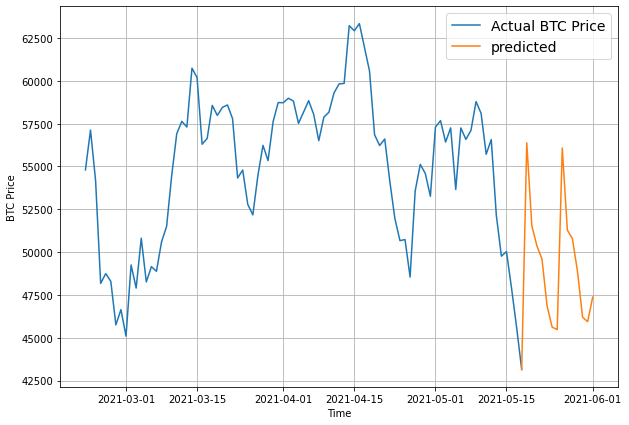

In [317]:
#plot future prices predictions of Bitcoin

plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price,start=2700,format="-",label='Actual BTC Price')
plot_time_series(next_time_steps,future_forecast,format='-',label="predicted")

## MOdel 10: Why forecasting is BS (turkey problem)

In [319]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [320]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [327]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

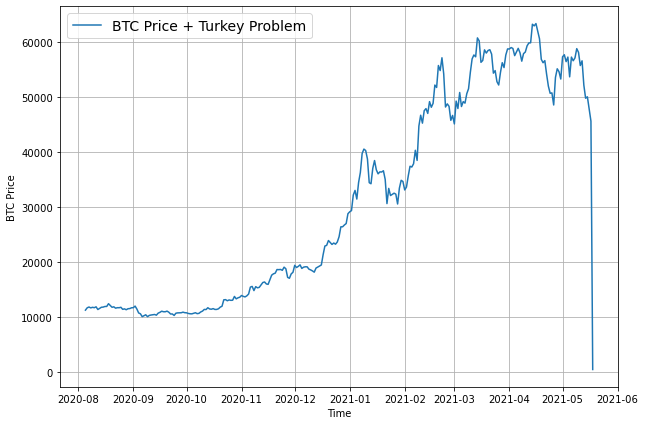

In [329]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
         values=btc_price_turkey,
         format='-',
         label='BTC Price + Turkey Problem',
         start=2500)

In [330]:
HORIZON=1
WINDOW_SIZE =7

In [478]:
# Create train and test sets for turkey probleum data
full_windows,full_labels = make_windows(np.array(btc_price_turkey),WINDOW_SIZE,HORIZON)

X_train,X_test,y_train,y_test = make_train_test_splits(full_windows,full_labels)

In [433]:
X_train = tf.data.Dataset.from_tensor_slices(X_train)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
X_test = tf.data.Dataset.from_tensor_slices(X_test)
y_test = tf.data.Dataset.from_tensor_slices(y_test)

train_model_10 = tf.data.Dataset.zip((X_train,y_train))
test_model_10 = tf.data.Dataset.zip((X_test,y_test))

train_model_10 = train_model_10.batch(1024).prefetch(tf.data.AUTOTUNE)
test_model_10= test_model_10.batch(1024).prefetch(tf.data.AUTOTUNE)

In [333]:
X_train[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [466]:
model_10 = tf.keras.models.clone_model(model_1)
model_10._name = "model_10_turkey"

In [450]:
model_10 = tf.keras.Sequential([
    layers.Input(shape=(7),name = "input_shape"),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(1)
],name='model_10')

In [467]:
model_10.compile(loss='mae',metrics=['mae','mse'],optimizer='adam')

In [389]:
model_10.build()

In [468]:
model_10.summary()

Model: "model_10_turkey"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [426]:
7*128+128

1024

In [439]:
%%time
model_10.fit(train_model_10,
            validation_data=test_model_10,
            epochs=100,
            callbacks=[create_model_checkpoint(model_10.name)])

Epoch 1/100
3/3 [==============================] - 1s 351ms/step - loss: 2677.4521 - mae: 2677.4521 - mse: 16742433.0000 - val_loss: 11949.3467 - val_mae: 11949.3467 - val_mse: 252681856.0000
Epoch 2/100
3/3 [==============================] - 1s 315ms/step - loss: 1406.3638 - mae: 1406.3638 - mse: 4669995.5000 - val_loss: 4201.8496 - val_mae: 4201.8496 - val_mse: 35913688.0000
Epoch 3/100
3/3 [==============================] - 1s 318ms/step - loss: 303.8629 - mae: 303.8629 - mse: 313344.5625 - val_loss: 2348.2649 - val_mae: 2348.2649 - val_mse: 18863852.0000
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 570.1611 - mae: 570.1611 - mse: 1060337.6250 - val_loss: 3545.1990 - val_mae: 3545.1990 - val_mse: 32601542.0000
Epoch 5/100
3/3 [==============================] - 1s 322ms/step - loss: 515.6251 - mae: 515.6251 - mse: 843743.7500 - val_loss: 1745.3623 - val_mae: 1745.3623 - val_mse: 13410370.0000
Epoch 6/100
3/3 [==============================] - 1s 362ms/step 

Epoch 59/100
3/3 [==============================] - 0s 18ms/step - loss: 133.2626 - mae: 133.2626 - mse: 90623.3672 - val_loss: 747.9884 - val_mae: 747.9884 - val_mse: 5413082.0000
Epoch 60/100
3/3 [==============================] - 0s 234ms/step - loss: 133.8974 - mae: 133.8974 - mse: 96024.1797 - val_loss: 738.8049 - val_mae: 738.8049 - val_mse: 5459252.0000
Epoch 61/100
3/3 [==============================] - 0s 23ms/step - loss: 131.6306 - mae: 131.6306 - mse: 89038.8594 - val_loss: 741.0934 - val_mae: 741.0934 - val_mse: 5383302.5000
Epoch 62/100
3/3 [==============================] - 1s 263ms/step - loss: 132.7445 - mae: 132.7445 - mse: 94680.9141 - val_loss: 733.2375 - val_mae: 733.2375 - val_mse: 5421162.0000
Epoch 63/100
3/3 [==============================] - 0s 17ms/step - loss: 131.4271 - mae: 131.4271 - mse: 88453.4141 - val_loss: 736.2660 - val_mae: 736.2660 - val_mse: 5353540.0000
Epoch 64/100
3/3 [==============================] - 1s 271ms/step - loss: 131.8719 - mae: 131

Epoch 91/100
3/3 [==============================] - 0s 23ms/step - loss: 124.8759 - mae: 124.8759 - mse: 80520.8672 - val_loss: 687.5594 - val_mae: 687.5594 - val_mse: 5108008.5000
Epoch 92/100
3/3 [==============================] - 1s 288ms/step - loss: 122.4024 - mae: 122.4024 - mse: 83421.7109 - val_loss: 683.3237 - val_mae: 683.3237 - val_mse: 5138367.0000
Epoch 93/100
3/3 [==============================] - 0s 20ms/step - loss: 125.1917 - mae: 125.1917 - mse: 80413.0469 - val_loss: 686.3359 - val_mae: 686.3359 - val_mse: 5098152.0000
Epoch 94/100
3/3 [==============================] - 1s 278ms/step - loss: 122.1066 - mae: 122.1066 - mse: 82958.7891 - val_loss: 682.0236 - val_mae: 682.0236 - val_mse: 5133956.0000
Epoch 95/100
3/3 [==============================] - 0s 24ms/step - loss: 124.2282 - mae: 124.2282 - mse: 79697.1641 - val_loss: 685.0081 - val_mae: 685.0081 - val_mse: 5088953.5000
Epoch 96/100
3/3 [==============================] - 1s 285ms/step - loss: 120.9733 - mae: 120

In [442]:
model=load_model("model_experiment/model_10/")

In [443]:
model.evaluate(test_model_10)

1/1 [==============================] - 0s 167ms/step - loss: 677.4432 - mae: 677.4432 - mse: 5111628.0000


[677.4432373046875, 677.4432373046875, 5111628.0]

In [484]:
turkey_preds = make_preds(model_10,test_model_10)

In [456]:
y_test

<TensorSliceDataset shapes: (1,), types: tf.float64>

In [471]:
turkey_preds

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8778.385 ,  8668.549 ,  8946.971 ,  8719.741 ,  8623.909 ,
        8658.228 ,  8619.049 ,  8408.3955,  8386.47  ,  8441.518 ,
        8183.819 ,  8021.747 ,  7986.3022,  7620.771 ,  7188.68  ,
        7187.3696,  7025.5615,  7085.9097,  7078.0713,  7411.5786,
        7349.4893,  7620.182 ,  7502.6094,  7355.9907,  7225.855 ,
        7268.2686,  7148.4526,  7287.779 ,  7437.5913,  7476.184 ,
        7468.024 ,  7305.2144,  7169.412 ,  7120.8345,  7126.412 ,
        7152.7188,  7046.416 ,  7029.047 ,  6848.858 ,  6555.9287,
        7186.051 ,  7198.648 ,  7070.881 ,  7141.07  ,  7249.9165,
        7080.887 ,  7147.2236,  7161.9575,  7117.596 ,  7143.2124,
        7238.395 ,  7311.63  ,  7208.1846,  7112.304 ,  7098.668 ,
        6927.9155,  7147.138 ,  7282.694 ,  7298.8125,  7562.7803,
        7966.554 ,  8021.74  ,  7769.594 ,  7954.7236,  8032.3574,
        8074.9204,  8024.9395,  8578.604 ,  8788.543 ,  8679.846 ,
        8772.6

In [483]:
turkey_preds

{'mae': 691.45496,
 'mse': 4852130.5,
 'rmse': 2202.7551,
 'mape': 21.390478,
 'mase': 1.0700288}

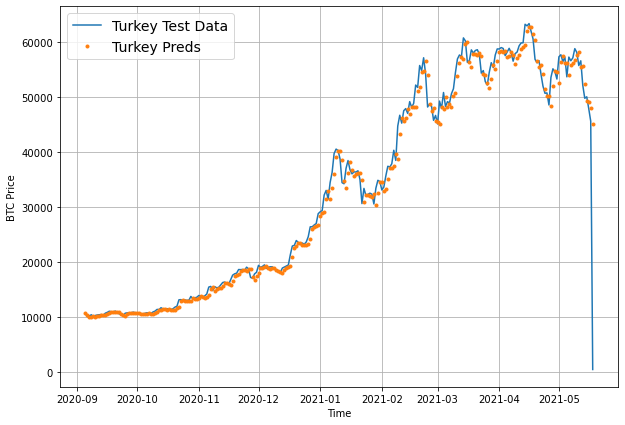

In [485]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

In [476]:
turkey_preds =evaluate_preds(y_test.flatten(),
                     turkey_preds)

In [475]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [473]:
model_preds

{'mae': 691.45496,
 'mse': 4852130.5,
 'rmse': 2202.7551,
 'mape': 21.390478,
 'mase': 1.0700288}

In [462]:
model_preds

{'mae': 677.44324,
 'mse': 5111628.0,
 'rmse': 2260.8909,
 'mape': 21.993103,
 'mase': 1.0483456}

In [469]:
%%time
model_10.fit(x=X_train,
            y=y_train,
             batch_size=128,
            validation_data=(X_test,y_test),
            epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 19ms/step - loss: 910.6824 - mae: 910.6824 - mse: 3137916.0000 - val_loss: 2776.4536 - val_mae: 2776.4536 - val_mse: 23987940.0000
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 297.1787 - mae: 297.1787 - mse: 409419.7188 - val_loss: 1352.5813 - val_mae: 1352.5813 - val_mse: 10314437.0000
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 232.3934 - mae: 232.3934 - mse: 258413.5781 - val_loss: 1293.6466 - val_mae: 1293.6466 - val_mse: 9488863.0000
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 218.3065 - mae: 218.3065 - mse: 245975.4531 - val_loss: 1247.4363 - val_mae: 1247.4363 - val_mse: 9231879.0000
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 210.6752 - mae: 210.6752 - mse: 231823.9688 - val_loss: 1267.1111 - val_mae: 1267.1111 - val_mse: 8889160.0000
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 

Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9509 - mae: 113.9509 - mse: 76578.1953 - val_loss: 687.9102 - val_mae: 687.9102 - val_mse: 4960832.5000
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4702 - mae: 113.4702 - mse: 77825.2812 - val_loss: 738.5416 - val_mae: 738.5416 - val_mse: 4984560.5000
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3943 - mae: 112.3943 - mse: 76340.1797 - val_loss: 715.2219 - val_mae: 715.2219 - val_mse: 4946004.0000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9316 - mae: 113.9316 - mse: 77226.8672 - val_loss: 731.7644 - val_mae: 731.7644 - val_mse: 4965111.5000
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9512 - mae: 118.9512 - mse: 79947.6562 - val_loss: 751.3452 - val_mae: 751.3452 - val_mse: 5303964.5000
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0778 - mae: 

18/18 [==============================] - 0s 8ms/step - loss: 112.3989 - mae: 112.3989 - mse: 72970.2578 - val_loss: 650.5928 - val_mae: 650.5928 - val_mse: 4883779.0000
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6363 - mae: 109.6363 - mse: 72420.8203 - val_loss: 680.1230 - val_mae: 680.1231 - val_mse: 5001032.5000
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1294 - mae: 115.1294 - mse: 73536.8594 - val_loss: 681.7811 - val_mae: 681.7811 - val_mse: 5007527.0000
Epoch 94/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5698 - mae: 115.5698 - mse: 75846.0000 - val_loss: 724.5936 - val_mae: 724.5937 - val_mse: 4891506.0000
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 109.8529 - mae: 109.8529 - mse: 69962.7734 - val_loss: 648.0812 - val_mae: 648.0812 - val_mse: 4865130.5000
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 117.5845 - mae: 117.5845 - ms

In [292]:
t=np.random.randint(1,10,(1,10))

In [268]:
d=np.array([[5]])

In [281]:
t,d

((10,), array([[5]]))

In [279]:
np.append(t,d)

array([3, 7, 1, 1, 9, 7, 8, 7, 1, 5, 5])

In [160]:
np.concatenate((np.expand_dims(bitcoin_prices_nbeats["Price"][-7:].to_numpy(),axis=0),[[5]]))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 7 and the array at index 1 has size 1

In [152]:
bitcoin_prices_nbeats["Price"][-7:].to_numpy()

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [182]:
bitcoin_prices_nbeats["Price"][-7:].to_list()

[56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [217]:
future = bitcoin_prices_nbeats["Price"][-7:].to_numpy()

In [186]:
np.array(future)

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [194]:
tf.expand_dims(np.array(future,dtype='float32'),axis=0)

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[56573.555, 52147.82 , 49764.133, 50032.69 , 47885.625, 45604.617,
        43144.473]], dtype=float32)>

In [197]:
future

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [261]:
model_9.predict(tf.expand_dims(future,axis=0))

array([[50441.51]], dtype=float32)

In [203]:
np.array(future)

array([5.65735555e+04, 5.21478212e+04, 4.97641321e+04, 5.00326931e+04,
       4.78856253e+04, 4.56046158e+04, 4.31444713e+04, 5.00000000e+00])

In [294]:
future_forecast

[56383.27,
 51542.98,
 50366.848,
 49593.688,
 46863.066,
 45619.29,
 45473.23,
 56083.08,
 51286.246,
 50778.07,
 48874.223,
 46199.145,
 45938.523,
 47372.285]

In [204]:
future

[56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603,
 5]

In [238]:
future = bitcoin_prices_nbeats["Price"][-7:].to_list()
hasil = []
for index,i in enumerate(range(30)):  

    pred= model_9.predict(tf.expand_dims(np.array(future,dtype='float32'),axis=0))
    future.append(pred.flatten()[0])
    hasil.append(pred.flatten()[0])
   # print(future)
    future = future[-7:]
  #  print(f"bag 2:{future}")
    

In [232]:
bitcoin_prices_nbeats["Price"][-7:].to_numpy()

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [295]:
future_forecast

[56383.27,
 51542.98,
 50366.848,
 49593.688,
 46863.066,
 45619.29,
 45473.23,
 56083.08,
 51286.246,
 50778.07,
 48874.223,
 46199.145,
 45938.523,
 47372.285]

In [237]:
hasil

[56383.27,
 51542.98,
 50366.848,
 49593.688,
 46863.066,
 45619.29,
 45473.23,
 56083.08,
 51286.246,
 50778.07,
 48874.223,
 46199.145,
 45938.523,
 47372.285,
 55701.46,
 51206.2,
 50937.137,
 48067.402,
 45906.25,
 46431.477,
 48991.45,
 55292.043,
 51229.91,
 50805.996,
 47302.207,
 45916.824,
 47059.477,
 50372.91,
 54884.777,
 51275.86]

In [231]:
future

[56383.27, 51542.98, 50366.848, 49593.688, 46863.066, 45619.29, 45473.23]

In [44]:
ensemble_preds.median(axis=0)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'median'

In [30]:
subtacted,added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])>)

In [31]:
import numpy as np

In [35]:
np.zeros(shape=(7)) +np.ones((7))

array([1., 1., 1., 1., 1., 1., 1.])

In [38]:
tf.zeros((1,7))

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [116]:
tets=tf.keras.layers.Input(shape=(INPUT_SIZE),name=f'block_input_{i}')

In [120]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [119]:
tets

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'block_input_28')>

In [126]:
%%time
tf.random.set_seed(42)
#1. setip and instance of NBeatsBlock





# 2. Create input to stack

for j,_ in enumerate(range(N_STACKS-1)):
    if j==0:
        stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE),name=f'stack_input_{j}_block_{i}')
    else:
        stack_input = residuals
        
    #4. Create stacks of block layers
    for i, _ in enumerate(range(4)):
        #5 use the n beats block to caclulate 
        if i==0 and j==0 :
            nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON,
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                name='initialBlock')

            # 2. Create input to stack
            

            # 3. Create initial backcast and forecast input (backc=wards pred + horzion pred)
            backcast, forecast = nbeats_block_layer(stack_input)
            
            #residuals, forecast = nbeats_block_layer(stack_input)
            residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 
#         elif i==0 and j!=0:
#             nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
#                                   theta_size = THETA_SIZE,
#                                   horizon = HORIZON,
#                                   n_neurons = N_NEURONS,
#                                   n_layers = N_LAYERS,
#                                 name='initialBlock')

#             # 2. Create input to stack
#             stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE),name=f'stack_input_{j}_block_{i}')

#             # 3. Create initial backcast and forecast input (backc=wards pred + horzion pred)
#             backcast, forecast = nbeats_block_layer(residuals)
            
#             #residuals, forecast = nbeats_block_layer(stack_input)
#             residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 
        else:
            
       
            backcast,block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                              theta_size = THETA_SIZE,
                                              horizon = HORIZON,
                                              n_neurons = N_NEURONS,
                                              n_layers = N_LAYERS,
                                            name=f'NBeatsBlock_{i}')(residuals)
            residuals = layers.subtract([residuals,backcast],name=f'subtract_{i}')
            forecast = layers.add([forecast,block_forecast],name=f"add_{i}")
    
    forecast_global = layers.add([forecast,forecast_global],name='forecast_global')

#6. Put the stack model together

model_custom_1 = tf.keras.Model(inputs=stack_input,outputs=forecast_global,name='model_7_beats')

#7 compile model

model_custom_1.compile(loss='mae',optimizer='adam',metrics=['mae'])

model_custom_1.fit(train_dataset,
           epochs=N_EPOCHS,
           validation_data=test_dataset,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200,restore_best_weights=True),
                     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=100,verbose=1)])

   

ValueError: Found input tensor cannot be reached given provided output tensors. Please make sure the tensor KerasTensor(type_spec=TensorSpec(shape=(None, 7), dtype=tf.float32, name='stack_input_0_block_3'), name='stack_input_0_block_3', description="created by layer 'stack_input_0_block_3'") is included in the model inputs when building functional model.

In [54]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size:int,
                theta_size:int,
                horizon:int,
                n_neurons:int,
                n_layers:int,
                **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contatins stack of 4 full connect layers each relu activation
        
        self.hidden = [tf.keras.layers.Dense(n_neurons,activation='relu') for i in range(n_layers)]
        #output of block is theta layer iwht linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation='linear',name='theta')
        
    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

    def call(self,inputs):
        x = inputs
  
        for _ in range(N_STACKS):
            inputs = x
        
            for _ in range(4):
              #  inputs = x
                for layer in self.hidden:
                    x = layer(x)
                theta = self.theta_layer(x)
                # output the backcast and the forecast from theta

                backcast, forecast = theta[:, :self.input_size], theta[:,-self.horizon:]
                
                x = tf.keras.layers.subtract([tf.cast(inputs[:,:WINDOW_SIZE],dtype=tf.float32),backcast])
               
                forecast = tf.keras.layers.add([forecast,tf.zeros((1,HORIZON),dtype=tf.float32)])
            
            global_forecast = tf.keras.layers.add([forecast,tf.zeros((1,HORIZON),dtype=tf.float32)])
            
        return global_forecast
        
    

In [55]:
tf.random.set_seed(42)
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE),name='stack_input')
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON,
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                name='initialBlock')
outputs = nbeats_block_layer(stack_input)
model_custom = tf.keras.Model(inputs=stack_input,outputs=outputs)

model_custom.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_custom.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
           # verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 21s 2s/step - loss: 17687.0371 - mae: 17687.0371 - mse: 994774848.0000 - val_loss: 7590.6626 - val_mae: 7590.6626 - val_mse: 104831224.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 1s 190ms/step - loss: 8041.6763 - mae: 8041.6763 - mse: 786662208.0000 - val_loss: 9993.0186 - val_mae: 9993.0186 - val_mse: 176168848.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 1s 190ms/step - loss: 2821.2029 - mae: 2821.2029 - mse: 20461996.0000 - val_loss: 17931.6738 - val_mae: 17931.6738 - val_mse: 566318144.0000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 1s 196ms/step - loss: 1871.4103 - mae: 1871.4103 - mse: 9342614.0000 - val_loss: 10376.2939 - val_mae: 10376.2939 - val_mse: 191614320.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 1s 201ms/step - loss: 2202.4814 - mae: 2202.4814 - mse: 12167376.0000 - val_loss: 5795.1167 - val_mae: 5795.1167 - val_mse: 626

Epoch 41/5000
3/3 [==============================] - 1s 187ms/step - loss: 2522.9102 - mae: 2522.9102 - mse: 15248395.0000 - val_loss: 12916.8779 - val_mae: 12916.8779 - val_mse: 294250208.0000 - lr: 0.0010
Epoch 42/5000
3/3 [==============================] - 1s 195ms/step - loss: 1263.4303 - mae: 1263.4303 - mse: 4024796.5000 - val_loss: 26547.1621 - val_mae: 26547.1621 - val_mse: 1250869632.0000 - lr: 0.0010
Epoch 43/5000
3/3 [==============================] - 1s 186ms/step - loss: 10892.8008 - mae: 10892.8008 - mse: 355258208.0000 - val_loss: 9804.1260 - val_mae: 9804.1260 - val_mse: 169858176.0000 - lr: 0.0010
Epoch 44/5000
3/3 [==============================] - 1s 196ms/step - loss: 2487.4028 - mae: 2487.4028 - mse: 15981406.0000 - val_loss: 18543.1719 - val_mae: 18543.1719 - val_mse: 605420608.0000 - lr: 0.0010
Epoch 45/5000
3/3 [==============================] - 1s 189ms/step - loss: 3004.8994 - mae: 3004.8994 - mse: 22007910.0000 - val_loss: 19580.4297 - val_mae: 19580.4297 - v

Epoch 81/5000
3/3 [==============================] - 1s 188ms/step - loss: 10479.9180 - mae: 10479.9180 - mse: 339201824.0000 - val_loss: 11655.8828 - val_mae: 11655.8828 - val_mse: 239959664.0000 - lr: 0.0010
Epoch 82/5000
3/3 [==============================] - 1s 227ms/step - loss: 2427.2893 - mae: 2427.2893 - mse: 14844294.0000 - val_loss: 16132.8594 - val_mae: 16132.8594 - val_mse: 458642848.0000 - lr: 0.0010
Epoch 83/5000
3/3 [==============================] - 1s 223ms/step - loss: 2528.6960 - mae: 2528.6960 - mse: 15550534.0000 - val_loss: 16286.9717 - val_mae: 16286.9717 - val_mse: 467367392.0000 - lr: 0.0010
Epoch 84/5000
3/3 [==============================] - 1s 186ms/step - loss: 2558.0876 - mae: 2558.0876 - mse: 15889180.0000 - val_loss: 16071.2119 - val_mae: 16071.2119 - val_mse: 455119040.0000 - lr: 0.0010
Epoch 85/5000
3/3 [==============================] - 1s 202ms/step - loss: 2469.0029 - mae: 2469.0029 - mse: 14736947.0000 - val_loss: 14625.8438 - val_mae: 14625.8438 -

3/3 [==============================] - 1s 214ms/step - loss: 175.0635 - mae: 175.0635 - mse: 157704.5000 - val_loss: 935.7474 - val_mae: 935.7474 - val_mse: 2897631.7500 - lr: 0.0010
Epoch 122/5000
3/3 [==============================] - 1s 211ms/step - loss: 190.1648 - mae: 190.1648 - mse: 176091.6094 - val_loss: 1310.2467 - val_mae: 1310.2467 - val_mse: 4355669.5000 - lr: 0.0010
Epoch 123/5000
3/3 [==============================] - 1s 210ms/step - loss: 325.0880 - mae: 325.0880 - mse: 371227.2188 - val_loss: 940.6659 - val_mae: 940.6659 - val_mse: 2879480.5000 - lr: 0.0010
Epoch 124/5000
3/3 [==============================] - 1s 190ms/step - loss: 319.5946 - mae: 319.5946 - mse: 396543.5312 - val_loss: 948.0037 - val_mae: 948.0037 - val_mse: 3014263.2500 - lr: 0.0010
Epoch 125/5000
3/3 [==============================] - 1s 195ms/step - loss: 302.3202 - mae: 302.3202 - mse: 349078.7812 - val_loss: 1852.6848 - val_mae: 1852.6848 - val_mse: 8002006.5000 - lr: 0.0010
Epoch 126/5000
3/3 [=

3/3 [==============================] - 1s 203ms/step - loss: 159.4868 - mae: 159.4868 - mse: 128633.5547 - val_loss: 794.8537 - val_mae: 794.8537 - val_mse: 2062189.3750 - lr: 0.0010
Epoch 204/5000
3/3 [==============================] - 1s 198ms/step - loss: 178.6042 - mae: 178.6042 - mse: 143669.8594 - val_loss: 797.1608 - val_mae: 797.1608 - val_mse: 2058502.8750 - lr: 0.0010
Epoch 205/5000
3/3 [==============================] - 1s 197ms/step - loss: 176.9668 - mae: 176.9668 - mse: 147936.6562 - val_loss: 766.9047 - val_mae: 766.9047 - val_mse: 2015630.2500 - lr: 0.0010
Epoch 206/5000
3/3 [==============================] - 1s 194ms/step - loss: 173.8750 - mae: 173.8750 - mse: 138807.5156 - val_loss: 836.3880 - val_mae: 836.3880 - val_mse: 2154522.2500 - lr: 0.0010
Epoch 207/5000
3/3 [==============================] - 1s 194ms/step - loss: 160.4527 - mae: 160.4527 - mse: 129282.2031 - val_loss: 767.1729 - val_mae: 767.1729 - val_mse: 2008843.0000 - lr: 0.0010
Epoch 208/5000
3/3 [=====

3/3 [==============================] - 1s 231ms/step - loss: 177.4473 - mae: 177.4473 - mse: 144664.9375 - val_loss: 703.6241 - val_mae: 703.6241 - val_mse: 1683218.0000 - lr: 0.0010
Epoch 286/5000
3/3 [==============================] - 1s 203ms/step - loss: 180.2899 - mae: 180.2899 - mse: 140004.1562 - val_loss: 862.1907 - val_mae: 862.1907 - val_mse: 2118978.0000 - lr: 0.0010
Epoch 287/5000
3/3 [==============================] - 1s 207ms/step - loss: 143.0010 - mae: 143.0010 - mse: 107673.3984 - val_loss: 729.3196 - val_mae: 729.3196 - val_mse: 1814768.7500 - lr: 0.0010
Epoch 288/5000
3/3 [==============================] - 1s 211ms/step - loss: 133.3146 - mae: 133.3146 - mse: 96474.9766 - val_loss: 721.4387 - val_mae: 721.4387 - val_mse: 1724353.8750 - lr: 0.0010
Epoch 289/5000
3/3 [==============================] - 1s 210ms/step - loss: 132.6633 - mae: 132.6633 - mse: 98120.4375 - val_loss: 744.0687 - val_mae: 744.0687 - val_mse: 1757902.3750 - lr: 0.0010
Epoch 290/5000
3/3 [=======

3/3 [==============================] - 1s 204ms/step - loss: 193.1801 - mae: 193.1801 - mse: 169553.1875 - val_loss: 936.0861 - val_mae: 936.0861 - val_mse: 2950981.0000 - lr: 0.0010
Epoch 327/5000
3/3 [==============================] - 1s 216ms/step - loss: 171.3128 - mae: 171.3128 - mse: 153204.0938 - val_loss: 1199.2577 - val_mae: 1199.2577 - val_mse: 3797189.0000 - lr: 0.0010
Epoch 328/5000
3/3 [==============================] - 1s 204ms/step - loss: 238.1579 - mae: 238.1579 - mse: 229015.8750 - val_loss: 929.4086 - val_mae: 929.4086 - val_mse: 2906521.7500 - lr: 0.0010
Epoch 329/5000
3/3 [==============================] - 1s 210ms/step - loss: 314.8619 - mae: 314.8619 - mse: 377831.9375 - val_loss: 921.9610 - val_mae: 921.9610 - val_mse: 2745171.2500 - lr: 0.0010
Epoch 330/5000
3/3 [==============================] - 1s 210ms/step - loss: 330.4099 - mae: 330.4099 - mse: 391913.8438 - val_loss: 1846.8772 - val_mae: 1846.8772 - val_mse: 7784392.5000 - lr: 0.0010
Epoch 331/5000
3/3 [=

3/3 [==============================] - 1s 224ms/step - loss: 129.4276 - mae: 129.4276 - mse: 95939.1562 - val_loss: 727.8069 - val_mae: 727.8069 - val_mse: 1750007.7500 - lr: 1.0000e-04
Epoch 408/5000
3/3 [==============================] - 1s 212ms/step - loss: 129.4400 - mae: 129.4400 - mse: 95589.4375 - val_loss: 729.0076 - val_mae: 729.0076 - val_mse: 1747752.6250 - lr: 1.0000e-04
Epoch 409/5000
3/3 [==============================] - 1s 212ms/step - loss: 129.2536 - mae: 129.2536 - mse: 95182.3359 - val_loss: 724.7917 - val_mae: 724.7917 - val_mse: 1733438.5000 - lr: 1.0000e-04
Epoch 410/5000
3/3 [==============================] - 1s 235ms/step - loss: 128.6220 - mae: 128.6220 - mse: 94657.9453 - val_loss: 719.1005 - val_mae: 719.1005 - val_mse: 1716034.0000 - lr: 1.0000e-04
Epoch 411/5000
3/3 [==============================] - 1s 208ms/step - loss: 128.0807 - mae: 128.0807 - mse: 94179.3984 - val_loss: 716.3527 - val_mae: 716.3527 - val_mse: 1704788.3750 - lr: 1.0000e-04
Epoch 412/

Epoch 448/5000
3/3 [==============================] - 1s 203ms/step - loss: 117.1454 - mae: 117.1454 - mse: 80832.0469 - val_loss: 643.2886 - val_mae: 643.2886 - val_mse: 1403164.3750 - lr: 1.0000e-04
Epoch 449/5000
3/3 [==============================] - 1s 215ms/step - loss: 116.9334 - mae: 116.9334 - mse: 80641.3672 - val_loss: 641.3871 - val_mae: 641.3871 - val_mse: 1397990.2500 - lr: 1.0000e-04
Epoch 450/5000
3/3 [==============================] - 1s 211ms/step - loss: 116.7883 - mae: 116.7883 - mse: 80473.0391 - val_loss: 641.1815 - val_mae: 641.1815 - val_mse: 1395679.0000 - lr: 1.0000e-04
Epoch 451/5000
3/3 [==============================] - 1s 207ms/step - loss: 116.7341 - mae: 116.7341 - mse: 80317.0703 - val_loss: 638.9701 - val_mae: 638.9701 - val_mse: 1390208.7500 - lr: 1.0000e-04
Epoch 452/5000
3/3 [==============================] - 1s 210ms/step - loss: 116.4262 - mae: 116.4262 - mse: 80149.1172 - val_loss: 637.7414 - val_mae: 637.7414 - val_mse: 1386459.1250 - lr: 1.0000

Epoch 489/5000
3/3 [==============================] - 1s 206ms/step - loss: 113.4972 - mae: 113.4972 - mse: 76436.7734 - val_loss: 614.5499 - val_mae: 614.5499 - val_mse: 1308397.3750 - lr: 1.0000e-04
Epoch 490/5000
3/3 [==============================] - 1s 230ms/step - loss: 113.2133 - mae: 113.2133 - mse: 76390.6875 - val_loss: 612.3607 - val_mae: 612.3607 - val_mse: 1305042.5000 - lr: 1.0000e-04
Epoch 491/5000
3/3 [==============================] - 1s 227ms/step - loss: 113.3657 - mae: 113.3657 - mse: 76281.6797 - val_loss: 612.9985 - val_mae: 612.9985 - val_mse: 1304685.8750 - lr: 1.0000e-04
Epoch 492/5000
3/3 [==============================] - 1s 216ms/step - loss: 113.0661 - mae: 113.0661 - mse: 76264.7188 - val_loss: 611.6967 - val_mae: 611.6967 - val_mse: 1302395.0000 - lr: 1.0000e-04
Epoch 493/5000
3/3 [==============================] - 1s 218ms/step - loss: 113.3688 - mae: 113.3688 - mse: 76145.4297 - val_loss: 611.8257 - val_mae: 611.8257 - val_mse: 1301554.6250 - lr: 1.0000

Epoch 530/5000
3/3 [==============================] - 1s 213ms/step - loss: 111.1312 - mae: 111.1312 - mse: 74294.5859 - val_loss: 597.9233 - val_mae: 597.9233 - val_mse: 1262103.2500 - lr: 1.0000e-04
Epoch 531/5000
3/3 [==============================] - 1s 227ms/step - loss: 111.5154 - mae: 111.5154 - mse: 74045.5078 - val_loss: 599.0906 - val_mae: 599.0906 - val_mse: 1262017.1250 - lr: 1.0000e-04
Epoch 532/5000
3/3 [==============================] - 1s 216ms/step - loss: 111.0339 - mae: 111.0339 - mse: 74194.3906 - val_loss: 598.0737 - val_mae: 598.0737 - val_mse: 1260648.7500 - lr: 1.0000e-04
Epoch 533/5000
3/3 [==============================] - 1s 212ms/step - loss: 111.6071 - mae: 111.6071 - mse: 73960.2109 - val_loss: 599.0780 - val_mae: 599.0780 - val_mse: 1260724.7500 - lr: 1.0000e-04
Epoch 534/5000
3/3 [==============================] - 1s 212ms/step - loss: 110.9532 - mae: 110.9532 - mse: 74106.8125 - val_loss: 597.1168 - val_mae: 597.1168 - val_mse: 1258777.7500 - lr: 1.0000

Epoch 571/5000
3/3 [==============================] - 1s 219ms/step - loss: 109.5350 - mae: 109.5350 - mse: 72610.0234 - val_loss: 588.5959 - val_mae: 588.5959 - val_mse: 1231250.0000 - lr: 1.0000e-04
Epoch 572/5000
3/3 [==============================] - 1s 207ms/step - loss: 109.7631 - mae: 109.7631 - mse: 72326.4922 - val_loss: 589.5218 - val_mae: 589.5218 - val_mse: 1230696.5000 - lr: 1.0000e-04
Epoch 573/5000
3/3 [==============================] - 1s 211ms/step - loss: 109.4316 - mae: 109.4316 - mse: 72440.7734 - val_loss: 588.0520 - val_mae: 588.0520 - val_mse: 1230412.8750 - lr: 1.0000e-04
Epoch 574/5000
3/3 [==============================] - 1s 209ms/step - loss: 109.4376 - mae: 109.4376 - mse: 72417.9922 - val_loss: 588.3994 - val_mae: 588.3994 - val_mse: 1228931.8750 - lr: 1.0000e-04
Epoch 575/5000
3/3 [==============================] - 1s 212ms/step - loss: 109.4445 - mae: 109.4445 - mse: 72267.6641 - val_loss: 588.2536 - val_mae: 588.2536 - val_mse: 1228169.1250 - lr: 1.0000

Epoch 612/5000
3/3 [==============================] - 1s 209ms/step - loss: 109.1154 - mae: 109.1154 - mse: 70899.8984 - val_loss: 582.0305 - val_mae: 582.0305 - val_mse: 1204570.0000 - lr: 1.0000e-04
Epoch 613/5000
3/3 [==============================] - 1s 210ms/step - loss: 108.2748 - mae: 108.2748 - mse: 71445.5000 - val_loss: 580.8815 - val_mae: 580.8815 - val_mse: 1204848.6250 - lr: 1.0000e-04
Epoch 614/5000
3/3 [==============================] - 1s 236ms/step - loss: 108.5330 - mae: 108.5330 - mse: 70798.5547 - val_loss: 582.0941 - val_mae: 582.0941 - val_mse: 1203836.7500 - lr: 1.0000e-04
Epoch 615/5000
3/3 [==============================] - 1s 218ms/step - loss: 108.0019 - mae: 108.0019 - mse: 71031.6797 - val_loss: 580.6171 - val_mae: 580.6171 - val_mse: 1203196.1250 - lr: 1.0000e-04
Epoch 616/5000
3/3 [==============================] - 1s 212ms/step - loss: 108.1630 - mae: 108.1630 - mse: 70750.6562 - val_loss: 580.8564 - val_mae: 580.8564 - val_mse: 1202275.0000 - lr: 1.0000

Epoch 653/5000
3/3 [==============================] - 1s 227ms/step - loss: 107.0696 - mae: 107.0696 - mse: 69715.4844 - val_loss: 576.1133 - val_mae: 576.1133 - val_mse: 1184921.0000 - lr: 1.0000e-04
Epoch 654/5000
3/3 [==============================] - 1s 227ms/step - loss: 106.8731 - mae: 106.8731 - mse: 69791.8906 - val_loss: 575.6125 - val_mae: 575.6125 - val_mse: 1185274.5000 - lr: 1.0000e-04
Epoch 655/5000
3/3 [==============================] - 1s 213ms/step - loss: 106.8224 - mae: 106.8224 - mse: 69816.1406 - val_loss: 576.1223 - val_mae: 576.1223 - val_mse: 1184354.0000 - lr: 1.0000e-04
Epoch 656/5000
3/3 [==============================] - 1s 213ms/step - loss: 107.1801 - mae: 107.1801 - mse: 69600.3203 - val_loss: 575.4433 - val_mae: 575.4433 - val_mse: 1184415.2500 - lr: 1.0000e-04
Epoch 657/5000
3/3 [==============================] - 1s 215ms/step - loss: 106.8549 - mae: 106.8549 - mse: 70058.4453 - val_loss: 575.3859 - val_mae: 575.3859 - val_mse: 1183821.1250 - lr: 1.0000

Epoch 694/5000
3/3 [==============================] - 1s 216ms/step - loss: 106.2720 - mae: 106.2720 - mse: 68793.9453 - val_loss: 571.9160 - val_mae: 571.9160 - val_mse: 1170671.6250 - lr: 1.0000e-04
Epoch 695/5000
3/3 [==============================] - 1s 212ms/step - loss: 105.8080 - mae: 105.8080 - mse: 69132.8828 - val_loss: 572.1536 - val_mae: 572.1536 - val_mse: 1169583.2500 - lr: 1.0000e-04
Epoch 696/5000
3/3 [==============================] - 1s 220ms/step - loss: 106.1213 - mae: 106.1213 - mse: 68747.9609 - val_loss: 571.7010 - val_mae: 571.7010 - val_mse: 1169673.0000 - lr: 1.0000e-04
Epoch 697/5000
3/3 [==============================] - 1s 210ms/step - loss: 105.7917 - mae: 105.7917 - mse: 69158.6328 - val_loss: 572.9847 - val_mae: 572.9847 - val_mse: 1169589.7500 - lr: 1.0000e-04
Epoch 698/5000
3/3 [==============================] - 1s 216ms/step - loss: 106.9065 - mae: 106.9065 - mse: 68756.2109 - val_loss: 571.8569 - val_mae: 571.8569 - val_mse: 1170666.8750 - lr: 1.0000

Epoch 735/5000
3/3 [==============================] - 1s 224ms/step - loss: 105.2427 - mae: 105.2427 - mse: 68413.2500 - val_loss: 570.6172 - val_mae: 570.6172 - val_mse: 1164808.0000 - lr: 1.0000e-04
Epoch 736/5000
3/3 [==============================] - 1s 219ms/step - loss: 105.3598 - mae: 105.3598 - mse: 68273.8750 - val_loss: 570.8518 - val_mae: 570.8518 - val_mse: 1164629.3750 - lr: 1.0000e-04
Epoch 737/5000
3/3 [==============================] - 1s 230ms/step - loss: 105.2412 - mae: 105.2412 - mse: 68306.0156 - val_loss: 571.1453 - val_mae: 571.1453 - val_mse: 1164655.6250 - lr: 1.0000e-04
Epoch 738/5000
3/3 [==============================] - 1s 224ms/step - loss: 105.5136 - mae: 105.5136 - mse: 68206.0938 - val_loss: 570.2631 - val_mae: 570.2631 - val_mse: 1164127.8750 - lr: 1.0000e-04
Epoch 739/5000
3/3 [==============================] - 1s 223ms/step - loss: 105.1164 - mae: 105.1164 - mse: 68461.8672 - val_loss: 570.3598 - val_mae: 570.3598 - val_mse: 1163687.7500 - lr: 1.0000

Epoch 776/5000
3/3 [==============================] - 1s 238ms/step - loss: 117.3952 - mae: 117.3952 - mse: 78108.6328 - val_loss: 572.0500 - val_mae: 572.0500 - val_mse: 1170098.0000 - lr: 1.0000e-04
Epoch 777/5000
3/3 [==============================] - 1s 245ms/step - loss: 118.4509 - mae: 118.4509 - mse: 73498.0000 - val_loss: 600.3270 - val_mae: 600.3270 - val_mse: 1218779.5000 - lr: 1.0000e-04
Epoch 778/5000
3/3 [==============================] - 1s 232ms/step - loss: 107.8533 - mae: 107.8533 - mse: 70723.7734 - val_loss: 579.4518 - val_mae: 579.4518 - val_mse: 1188262.8750 - lr: 1.0000e-04
Epoch 779/5000
3/3 [==============================] - 1s 219ms/step - loss: 106.1449 - mae: 106.1449 - mse: 68342.5938 - val_loss: 570.4619 - val_mae: 570.4619 - val_mse: 1166067.3750 - lr: 1.0000e-04
Epoch 780/5000
3/3 [==============================] - 1s 221ms/step - loss: 106.7400 - mae: 106.7400 - mse: 70099.6406 - val_loss: 570.3846 - val_mae: 570.3846 - val_mse: 1166046.0000 - lr: 1.0000

Epoch 817/5000
3/3 [==============================] - 1s 235ms/step - loss: 108.6973 - mae: 108.6973 - mse: 68860.1406 - val_loss: 570.9401 - val_mae: 570.9401 - val_mse: 1164587.2500 - lr: 1.0000e-04
Epoch 818/5000
3/3 [==============================] - 1s 243ms/step - loss: 107.8798 - mae: 107.8798 - mse: 71038.9922 - val_loss: 570.3864 - val_mae: 570.3864 - val_mse: 1165599.7500 - lr: 1.0000e-04
Epoch 819/5000
3/3 [==============================] - 1s 241ms/step - loss: 109.2388 - mae: 109.2388 - mse: 69021.2500 - val_loss: 570.5837 - val_mae: 570.5837 - val_mse: 1164061.5000 - lr: 1.0000e-04
Epoch 820/5000
3/3 [==============================] - 1s 246ms/step - loss: 108.5273 - mae: 108.5273 - mse: 71537.0625 - val_loss: 571.3571 - val_mae: 571.3571 - val_mse: 1168281.1250 - lr: 1.0000e-04
Epoch 821/5000
3/3 [==============================] - 1s 233ms/step - loss: 108.6641 - mae: 108.6641 - mse: 68839.1875 - val_loss: 571.0983 - val_mae: 571.0983 - val_mse: 1164431.2500 - lr: 1.0000

Epoch 858/5000
3/3 [==============================] - 1s 228ms/step - loss: 107.3027 - mae: 107.3027 - mse: 70583.1094 - val_loss: 570.8715 - val_mae: 570.8715 - val_mse: 1165214.8750 - lr: 1.0000e-04
Epoch 859/5000
3/3 [==============================] - 1s 233ms/step - loss: 106.9793 - mae: 106.9793 - mse: 68189.9766 - val_loss: 569.0806 - val_mae: 569.0806 - val_mse: 1159062.6250 - lr: 1.0000e-04
Epoch 860/5000
3/3 [==============================] - 1s 224ms/step - loss: 106.7984 - mae: 106.7984 - mse: 70187.9688 - val_loss: 568.6851 - val_mae: 568.6851 - val_mse: 1160102.2500 - lr: 1.0000e-04
Epoch 861/5000
3/3 [==============================] - 1s 226ms/step - loss: 108.0358 - mae: 108.0358 - mse: 68439.0938 - val_loss: 568.6383 - val_mae: 568.6383 - val_mse: 1158798.3750 - lr: 1.0000e-04
Epoch 862/5000
3/3 [==============================] - 1s 221ms/step - loss: 108.2926 - mae: 108.2926 - mse: 71334.3828 - val_loss: 568.7646 - val_mae: 568.7646 - val_mse: 1160285.2500 - lr: 1.0000

Epoch 899/5000
3/3 [==============================] - 1s 209ms/step - loss: 108.5042 - mae: 108.5042 - mse: 68539.4062 - val_loss: 569.4354 - val_mae: 569.4354 - val_mse: 1158202.1250 - lr: 1.0000e-04
Epoch 900/5000
3/3 [==============================] - 1s 207ms/step - loss: 107.0736 - mae: 107.0736 - mse: 70409.4531 - val_loss: 569.7638 - val_mae: 569.7638 - val_mse: 1162371.1250 - lr: 1.0000e-04
Epoch 901/5000
3/3 [==============================] - 1s 208ms/step - loss: 106.8958 - mae: 106.8958 - mse: 68069.7188 - val_loss: 568.4874 - val_mae: 568.4874 - val_mse: 1156961.0000 - lr: 1.0000e-04
Epoch 902/5000
3/3 [==============================] - 1s 209ms/step - loss: 106.5929 - mae: 106.5929 - mse: 70034.7109 - val_loss: 568.5531 - val_mae: 568.5531 - val_mse: 1159405.8750 - lr: 1.0000e-04
Epoch 903/5000
3/3 [==============================] - 1s 217ms/step - loss: 106.9971 - mae: 106.9971 - mse: 68068.8828 - val_loss: 568.0483 - val_mae: 568.0483 - val_mse: 1156661.3750 - lr: 1.0000

Epoch 940/5000
3/3 [==============================] - 1s 215ms/step - loss: 107.9808 - mae: 107.9808 - mse: 71113.6172 - val_loss: 567.8420 - val_mae: 567.8420 - val_mse: 1156016.5000 - lr: 1.0000e-04
Epoch 941/5000
3/3 [==============================] - 1s 212ms/step - loss: 110.0720 - mae: 110.0720 - mse: 69026.3359 - val_loss: 569.4515 - val_mae: 569.4515 - val_mse: 1156961.6250 - lr: 1.0000e-04
Epoch 942/5000
3/3 [==============================] - 1s 213ms/step - loss: 108.1251 - mae: 108.1251 - mse: 71234.9297 - val_loss: 570.2136 - val_mae: 570.2136 - val_mse: 1162342.7500 - lr: 1.0000e-04
Epoch 943/5000
3/3 [==============================] - 1s 222ms/step - loss: 107.9586 - mae: 107.9587 - mse: 68300.4531 - val_loss: 569.6030 - val_mae: 569.6030 - val_mse: 1157152.0000 - lr: 1.0000e-04
Epoch 944/5000
3/3 [==============================] - 1s 220ms/step - loss: 106.4825 - mae: 106.4825 - mse: 69964.8281 - val_loss: 569.3448 - val_mae: 569.3448 - val_mse: 1160625.8750 - lr: 1.0000

Epoch 981/5000
3/3 [==============================] - 1s 237ms/step - loss: 106.6553 - mae: 106.6553 - mse: 67878.9297 - val_loss: 568.2117 - val_mae: 568.2117 - val_mse: 1154566.6250 - lr: 1.0000e-04
Epoch 982/5000
3/3 [==============================] - 1s 214ms/step - loss: 106.2412 - mae: 106.2412 - mse: 69793.8047 - val_loss: 567.8635 - val_mae: 567.8635 - val_mse: 1156443.1250 - lr: 1.0000e-04
Epoch 983/5000
3/3 [==============================] - 1s 213ms/step - loss: 106.7503 - mae: 106.7503 - mse: 67863.1953 - val_loss: 567.6186 - val_mae: 567.6186 - val_mse: 1154212.1250 - lr: 1.0000e-04
Epoch 984/5000
3/3 [==============================] - 1s 221ms/step - loss: 107.3582 - mae: 107.3582 - mse: 70650.4609 - val_loss: 567.9448 - val_mae: 567.9448 - val_mse: 1156725.1250 - lr: 1.0000e-04
Epoch 985/5000
3/3 [==============================] - 1s 214ms/step - loss: 107.6501 - mae: 107.6501 - mse: 68112.9531 - val_loss: 567.9643 - val_mae: 567.9643 - val_mse: 1153712.8750 - lr: 1.0000

Epoch 1022/5000
3/3 [==============================] - 1s 221ms/step - loss: 106.9121 - mae: 106.9121 - mse: 70323.3203 - val_loss: 567.8846 - val_mae: 567.8846 - val_mse: 1156473.2500 - lr: 1.0000e-04
Epoch 1023/5000
3/3 [==============================] - 1s 222ms/step - loss: 107.2141 - mae: 107.2141 - mse: 67950.3125 - val_loss: 567.6248 - val_mae: 567.6248 - val_mse: 1153009.0000 - lr: 1.0000e-04
Epoch 1024/5000
3/3 [==============================] - 1s 227ms/step - loss: 107.3631 - mae: 107.3631 - mse: 70659.4297 - val_loss: 567.7710 - val_mae: 567.7710 - val_mse: 1156297.6250 - lr: 1.0000e-04
Epoch 1025/5000
3/3 [==============================] - 1s 217ms/step - loss: 107.8719 - mae: 107.8719 - mse: 68167.2109 - val_loss: 567.9407 - val_mae: 567.9407 - val_mse: 1153576.3750 - lr: 1.0000e-04
Epoch 1026/5000
3/3 [==============================] - 1s 224ms/step - loss: 107.3471 - mae: 107.3471 - mse: 70650.4766 - val_loss: 568.0375 - val_mae: 568.0375 - val_mse: 1157391.2500 - lr: 1

Epoch 1103/5000
3/3 [==============================] - 1s 211ms/step - loss: 106.5745 - mae: 106.5745 - mse: 67674.3047 - val_loss: 567.6651 - val_mae: 567.6651 - val_mse: 1151056.8750 - lr: 1.0000e-04
Epoch 1104/5000
3/3 [==============================] - 1s 210ms/step - loss: 106.2195 - mae: 106.2195 - mse: 69829.7266 - val_loss: 567.9976 - val_mae: 567.9976 - val_mse: 1155494.5000 - lr: 1.0000e-04
Epoch 1105/5000
3/3 [==============================] - 1s 212ms/step - loss: 106.0344 - mae: 106.0344 - mse: 67522.2578 - val_loss: 567.4044 - val_mae: 567.4044 - val_mse: 1150929.8750 - lr: 1.0000e-04
Epoch 1106/5000
3/3 [==============================] - 1s 218ms/step - loss: 106.1421 - mae: 106.1421 - mse: 69771.5156 - val_loss: 567.2502 - val_mae: 567.2502 - val_mse: 1152615.8750 - lr: 1.0000e-04
Epoch 1107/5000
3/3 [==============================] - 1s 217ms/step - loss: 106.8956 - mae: 106.8956 - mse: 67718.8516 - val_loss: 567.3207 - val_mae: 567.3207 - val_mse: 1150554.0000 - lr: 1

Epoch 1184/5000
3/3 [==============================] - 1s 242ms/step - loss: 106.5528 - mae: 106.5528 - mse: 70150.8984 - val_loss: 570.2517 - val_mae: 570.2517 - val_mse: 1158602.7500 - lr: 1.0000e-04
Epoch 1185/5000
3/3 [==============================] - 1s 239ms/step - loss: 105.5049 - mae: 105.5049 - mse: 67379.4297 - val_loss: 567.4153 - val_mae: 567.4153 - val_mse: 1149164.6250 - lr: 1.0000e-04
Epoch 1186/5000
3/3 [==============================] - 1s 236ms/step - loss: 105.5200 - mae: 105.5200 - mse: 69337.6641 - val_loss: 567.3196 - val_mae: 567.3196 - val_mse: 1151654.8750 - lr: 1.0000e-04
Epoch 1187/5000
3/3 [==============================] - 1s 237ms/step - loss: 105.7891 - mae: 105.7891 - mse: 67385.2969 - val_loss: 567.0820 - val_mae: 567.0820 - val_mse: 1149939.2500 - lr: 1.0000e-04
Epoch 1188/5000
3/3 [==============================] - 1s 221ms/step - loss: 106.6980 - mae: 106.6980 - mse: 70234.1172 - val_loss: 567.0776 - val_mae: 567.0776 - val_mse: 1149096.2500 - lr: 1

Epoch 1265/5000
3/3 [==============================] - 1s 218ms/step - loss: 108.5714 - mae: 108.5714 - mse: 68239.5156 - val_loss: 568.5517 - val_mae: 568.5517 - val_mse: 1149981.0000 - lr: 1.0000e-04
Epoch 1266/5000
3/3 [==============================] - 1s 219ms/step - loss: 107.1972 - mae: 107.1972 - mse: 70696.2578 - val_loss: 568.8721 - val_mae: 568.8721 - val_mse: 1154998.6250 - lr: 1.0000e-04
Epoch 1267/5000
3/3 [==============================] - 1s 216ms/step - loss: 107.4098 - mae: 107.4098 - mse: 67838.4531 - val_loss: 568.6708 - val_mae: 568.6708 - val_mse: 1150486.6250 - lr: 1.0000e-04
Epoch 1268/5000
3/3 [==============================] - 1s 216ms/step - loss: 105.8941 - mae: 105.8941 - mse: 69682.1484 - val_loss: 568.2004 - val_mae: 568.2004 - val_mse: 1153627.8750 - lr: 1.0000e-04
Epoch 1269/5000
3/3 [==============================] - 1s 222ms/step - loss: 106.2652 - mae: 106.2652 - mse: 67510.6016 - val_loss: 567.8406 - val_mae: 567.8406 - val_mse: 1149741.7500 - lr: 1

Epoch 1305/5000
3/3 [==============================] - 1s 224ms/step - loss: 103.4365 - mae: 103.4365 - mse: 67111.2266 - val_loss: 567.3965 - val_mae: 567.3965 - val_mse: 1147146.1250 - lr: 1.0000e-05
Epoch 1306/5000
3/3 [==============================] - 1s 229ms/step - loss: 103.4373 - mae: 103.4373 - mse: 67104.6562 - val_loss: 567.3877 - val_mae: 567.3877 - val_mse: 1147045.7500 - lr: 1.0000e-05
Epoch 1307/5000
3/3 [==============================] - 1s 221ms/step - loss: 103.4352 - mae: 103.4352 - mse: 67101.8672 - val_loss: 567.3672 - val_mae: 567.3672 - val_mse: 1146947.6250 - lr: 1.0000e-05
Epoch 1308/5000
3/3 [==============================] - 1s 203ms/step - loss: 103.4310 - mae: 103.4310 - mse: 67101.7734 - val_loss: 567.3453 - val_mae: 567.3453 - val_mse: 1146856.0000 - lr: 1.0000e-05
Epoch 1309/5000
3/3 [==============================] - 1s 217ms/step - loss: 103.4256 - mae: 103.4256 - mse: 67103.1406 - val_loss: 567.3299 - val_mae: 567.3299 - val_mse: 1146773.8750 - lr: 1

In [52]:
model_custom1 = model_custom

In [56]:
model_custom.evaluate(test_dataset)

1/1 [==============================] - 0s 261ms/step - loss: 566.9856 - mae: 566.9856 - mse: 1149188.1250


[566.985595703125, 566.985595703125, 1149188.125]

In [53]:
model_custom.evaluate(test_dataset)

1/1 [==============================] - 2s 2s/step - loss: 576.6179 - mae: 576.6179 - mse: 1172728.2500


[576.6178588867188, 576.6178588867188, 1172728.25]

In [63]:
# set up dummy NBeatsBlock layer
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size=WINDOW_SIZE+HORIZON,
                                      horizon = HORIZON,
                                      n_neurons=128,
                                      n_layers=4)

In [59]:
tf.zeros((1,7),dtype=tf.float32)

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [58]:
tf.keras.layers.subtract([tf.cast(dummy_inputs[:,:WINDOW_SIZE],dtype=tf.float32),backcast])

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[0.9203983, 1.6748797, 3.8428683, 4.6938987, 5.3172054, 6.5698733,
        7.639666 ]], dtype=float32)>

In [50]:
dummy_inputs[:,:WINDOW_SIZE]

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [64]:
forecast = dummy_nbeats_block_layer(dummy_inputs)

In [66]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [65]:
forecast

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[33.26951]], dtype=float32)>

In [ ]:
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])